<a href="https://colab.research.google.com/github/aloy99/data-science/blob/main/resnet_finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.10.11


In [ ]:


#install python 3.9 for compatibility with pytorch

!sudo apt-get update -y

!sudo apt-get install python3.9

!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1

!sudo update-alternatives --config python3

!apt-get install python3-pip

!python -m pip install --upgrade pip --user

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,726 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,204 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:14 htt

In [ ]:
!python --version

Python 3.9.16


In [ ]:
import os

In [ ]:
paths = {
    'ANNOTATION_PATH': os.path.join('workspace','annotations'),
    'ANNOTATION_DATA_PATH': os.path.join('workspace','annotations','annotations','list.txt'),
    'IMAGE_PATH': os.path.join('workspace','images'),
    'IMAGE_DATA_PATH': os.path.join('workspace','images','images'),
    'MODEL_PATH': os.path.join('workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('workspace','pre-trained-models'),
 }
for path in paths.values():
    if not os.path.exists(path):
        !mkdir -p {path}

In [ ]:
images_url = 'https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz'
labels_url = 'https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz'

In [ ]:
!pwd
!wget {images_url}
!wget {labels_url}


/content
--2023-05-29 19:57:08--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz [following]
--2023-05-29 19:57:09--  https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz
Reusing existing connection to thor.robots.ox.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  21.9MB/s    in 40s     

2023-05-29 19:57:49 (19.1 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2023-05-29 19:57:49--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robo

In [ ]:
!mv {'images.tar.gz'} {paths['IMAGE_PATH']}
!mv {'annotations.tar.gz'} {paths['ANNOTATION_PATH']}
!cd {paths['IMAGE_PATH']} && tar -zxvf {'images.tar.gz'} &> /dev/null
!cd {paths['ANNOTATION_PATH']}&& tar -zxvf {'annotations.tar.gz'} &> /dev/null

In [ ]:
!cd {paths['IMAGE_PATH']+'/images'} && ls &> /dev/null

In [ ]:
!cd {paths['ANNOTATION_PATH']+'/annotations'} && ls

list.txt  README  test.txt  trainval.txt  trimaps  xmls


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#check gpu given
!nvidia-smi

Mon May 29 19:58:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#check cuda version
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
#pip install pytorch
!pip3 install --upgrade --no-deps --force-reinstall torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 577.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 55.5 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models
import torchvision.transforms.v2 as transforms
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https:/

In [ ]:
#load labels
image_labels = pd.DataFrame(columns=['breed','species'])
with open(paths['ANNOTATION_DATA_PATH']) as file:
    for line in file:
        if line[0] != '#':
            parts = line.split(' ')
            image_labels.loc[parts[0]] = {'breed':parts[1], 'species':parts[2]}
image_labels[['breed','species']] = image_labels[['breed','species']].apply(pd.to_numeric).sub(1)

In [ ]:
print(len(image_labels))

7349


In [ ]:
def train_model(model, dataloaders, loss_fn, optimizer, n_epochs):

    training_hist = pd.DataFrame(index = list(range(1,n_epochs+1)),columns=['train loss','train acc','valid loss','valid acc'])

    best_acc = 0.0
    best_model = copy.deepcopy(model.state_dict())

    for epoch in range(n_epochs):
        print('_'*15)
        print(f'Epoch {epoch+1} of {n_epochs}')
        print('_'*15)

        #train or eval
        for i in ['train','validation']:
            if i == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            for imgs, labels in dataloaders[i]:
                imgs = imgs.to(device)
                labels = labels.type(torch.LongTensor)
                labels = labels.to(device)

                # print(imgs.device)
                # print(labels.device)
                # print(next(model.parameters()).device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(i=='train'): #disables storing grads if eval
                    output = model(imgs)
                    _, preds = torch.max(output, 1)
                    loss = loss_fn(output, labels)
                    if (i=='train'):
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * imgs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / train_valid_sizes[i]
            epoch_acc = running_corrects.double() / train_valid_sizes[i]

            print(f'For {i} set:  \nLoss: {epoch_loss} \nAccuracy: {epoch_acc}')
            print('\n')

            #store each time we get new best validation acc
            if i == 'validation':
                training_hist.loc[epoch+1,'valid loss'] = epoch_loss
                training_hist.loc[epoch+1,'valid acc'] = epoch_acc.detach().cpu().numpy()
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model = copy.deepcopy(model.state_dict())
            else:
                training_hist.loc[epoch+1,'train loss'] = epoch_loss
                training_hist.loc[epoch+1,'train acc'] = epoch_acc.detach().cpu().numpy()


    print(f'Returning best model which achieved a validation accuracy of {best_acc}')


    model.load_state_dict(best_model)
    return model, training_hist

In [ ]:
def set_parameter_requires_grad(model, feature_extraction):
    if feature_extraction:
        for param in model.parameters():
            param.requires_grad = False

In [ ]:
def get_params_learn(model):
    if feature_extraction:
        params_to_update = []
        for name,param in model.named_parameters():
            if param.requires_grad == True:
                params_to_update.append(param)
                print("\t",name)
    else:
        for name,param in model.named_parameters():
            if param.requires_grad == True:
                print("\t",name)
    return params_to_update

In [ ]:
def test_model(model, dataloader):
    model.eval()
    running_corrects = 0
    for imgs, labels in dataloader:
        imgs = imgs.to(device)
        labels = labels.type(torch.LongTensor)
        labels = labels.to(device)
        output = model(imgs)
        _, preds = torch.max(output, 1)
        running_corrects += torch.sum(preds == labels.data)

    test_acc = running_corrects.double() / len(dataloader.dataset)

    #add code to visualise first 16 images of test set and show predictions

    print(f'Model achieves accuracy of {test_acc} on test set')

    return test_acc

In [ ]:
class BreedImageDataset(Dataset):
    def __init__(self, annotations, img_dir, transform):
        self.labels = annotations
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.labels.index[idx]+'.jpg')
        image = Image.open(img_path).convert('RGB')
        label = torch.tensor(self.labels.iloc[idx, 0], dtype=torch.float32)
        if self.transform:
            image = self.transform(image)
        return image, label


# Cats or dogs?

(901, 600, 3)


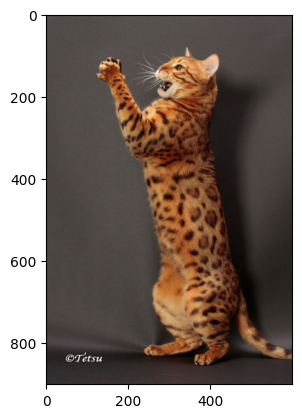

In [ ]:
#check image
img = np.asarray(Image.open(paths['IMAGE_PATH']+'/images/Bengal_1.jpg'))
print(img.shape)
imgplot = plt.imshow(img)

In [ ]:
class SpeciesImageDataset(Dataset):
    def __init__(self, annotations, img_dir, transform):
        self.labels = annotations
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.labels.index[idx]+'.jpg')
        image = Image.open(img_path).convert('RGB')
        label = torch.tensor(self.labels.iloc[idx, 1], dtype=torch.float32)
        if self.transform:
            image = self.transform(image)
        return image, label


In [ ]:
train_transform=transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

valid_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [ ]:
#load images
train_set = SpeciesImageDataset(image_labels, paths['IMAGE_DATA_PATH'], train_transform)
valid_set = SpeciesImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)
test_set = SpeciesImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)

TypeError: ignored

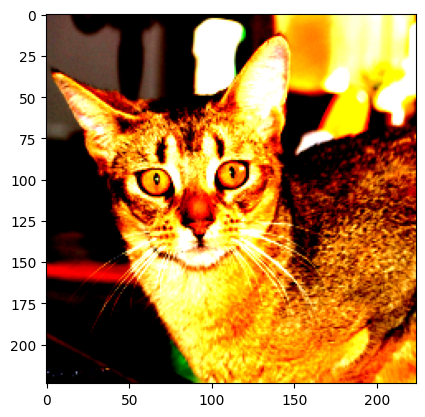

In [ ]:
train_set.__getitem__(2)
tensor_image = train_set.__getitem__(2)[0]
imgplot = plt.imshow(plt.imshow(  tensor_image.permute(1, 2, 0)  ))

In [ ]:
train_set.__getitem__(1)

(tensor([[[ 2.1804,  2.1633,  2.1633,  ..., -2.1179, -2.1179, -2.1179],
          [ 2.2147,  2.1975,  2.1975,  ..., -2.1179, -2.1179, -2.1179],
          [ 2.2147,  2.2147,  2.2147,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -1.2959, -1.2959, -1.6042],
          [-2.1179, -2.1179, -2.1179,  ...,  2.1975,  2.2147,  1.3070],
          [-2.1179, -2.1179, -2.1179,  ...,  2.2318,  2.2318,  2.2318]],
 
         [[ 1.6933,  1.6232,  1.6057,  ..., -2.0357, -2.0357, -2.0357],
          [ 1.7633,  1.6933,  1.6583,  ..., -2.0357, -2.0357, -2.0357],
          [ 1.7808,  1.7283,  1.6933,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -0.4951, -0.6001, -1.0203],
          [-2.0357, -2.0357, -2.0357,  ...,  2.4286,  2.4111,  1.5532],
          [-2.0357, -2.0357, -2.0357,  ...,  2.4111,  2.4286,  2.4111]],
 
         [[ 1.6988,  1.6291,  1.5768,  ..., -1.8044, -1.8044, -1.8044],
          [ 1.7860,  1.6988,

In [ ]:
#train-test split of indices
indices = np.array(range(len(image_labels.index)))

test_ratio = 0.1
valid_ratio = 0.2


non_test_idx, test_idx = train_test_split(indices, test_size = test_ratio, random_state = 1)
train_idx, valid_idx = train_test_split(non_test_idx, test_size = valid_ratio/(1-test_ratio), random_state = 1)


train_set = torch.utils.data.Subset(train_set, train_idx)
valid_set = torch.utils.data.Subset(valid_set, valid_idx)
test_set = torch.utils.data.Subset(test_set, test_idx)

print(f'train set has size of {len(train_set)}')
print(f'valid set has size of {len(valid_set)}')
print(f'test set has size of {len(test_set)}')

train set has size of 5144
valid set has size of 1470
test set has size of 735


In [ ]:
train_data_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle=True)
valid_data_loader = torch.utils.data.DataLoader(valid_set, batch_size = 64, shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_set, batch_size = 64, shuffle=True)
train_valid_loaders = {'train':train_data_loader, 'validation':valid_data_loader}
train_valid_sizes = {'train':len(train_set), 'validation':len(valid_set)}

In [ ]:
#check if gpu avail
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
#send model to device
weights = models.ResNet18_Weights.DEFAULT
model = models.resnet18(weights)
model = model.to(device)
#define loss fn
loss = nn.CrossEntropyLoss()
#feature extracting or finetuning
feature_extraction = True



cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 250MB/s]


In [ ]:
#we want all to requires_grad if fine tuning, but only new top layer to requires_grad if feature extracting

set_parameter_requires_grad(model, feature_extraction)


In [ ]:
#replace final layer
num_classes = 2
model.fc = nn.Linear(model.fc.in_features,num_classes)
model = model.to(device)

In [ ]:
params_to_update = model.parameters()

optimizer = optim.Adam(get_params_learn(model), lr = 0.003)

Params to learn:
	 fc.weight
	 fc.bias


In [ ]:
model, hist = train_model(model, {'train':train_data_loader, 'validation':valid_data_loader}, loss, optimizer, 50)

In [ ]:
torch.save(model.state_dict(), '/content/gdrive/My Drive/DD2424/catdog_50epochs.pt')
hist.to_csv('/content/gdrive/My Drive/DD2424/catdog_50epochs_hist.csv')

In [ ]:
hist.head()

,train loss,train acc,valid loss,valid acc
1,0.141968,0.9455676516329704,0.064939,0.9795918367346939
2,0.063157,0.9786158631415242,0.03462,0.9870748299319727
3,0.049831,0.9815318818040435,0.034556,0.9891156462585033
4,0.042846,0.9836702954898912,0.02708,0.9870748299319727
5,0.056323,0.9786158631415242,0.064483,0.9761904761904762


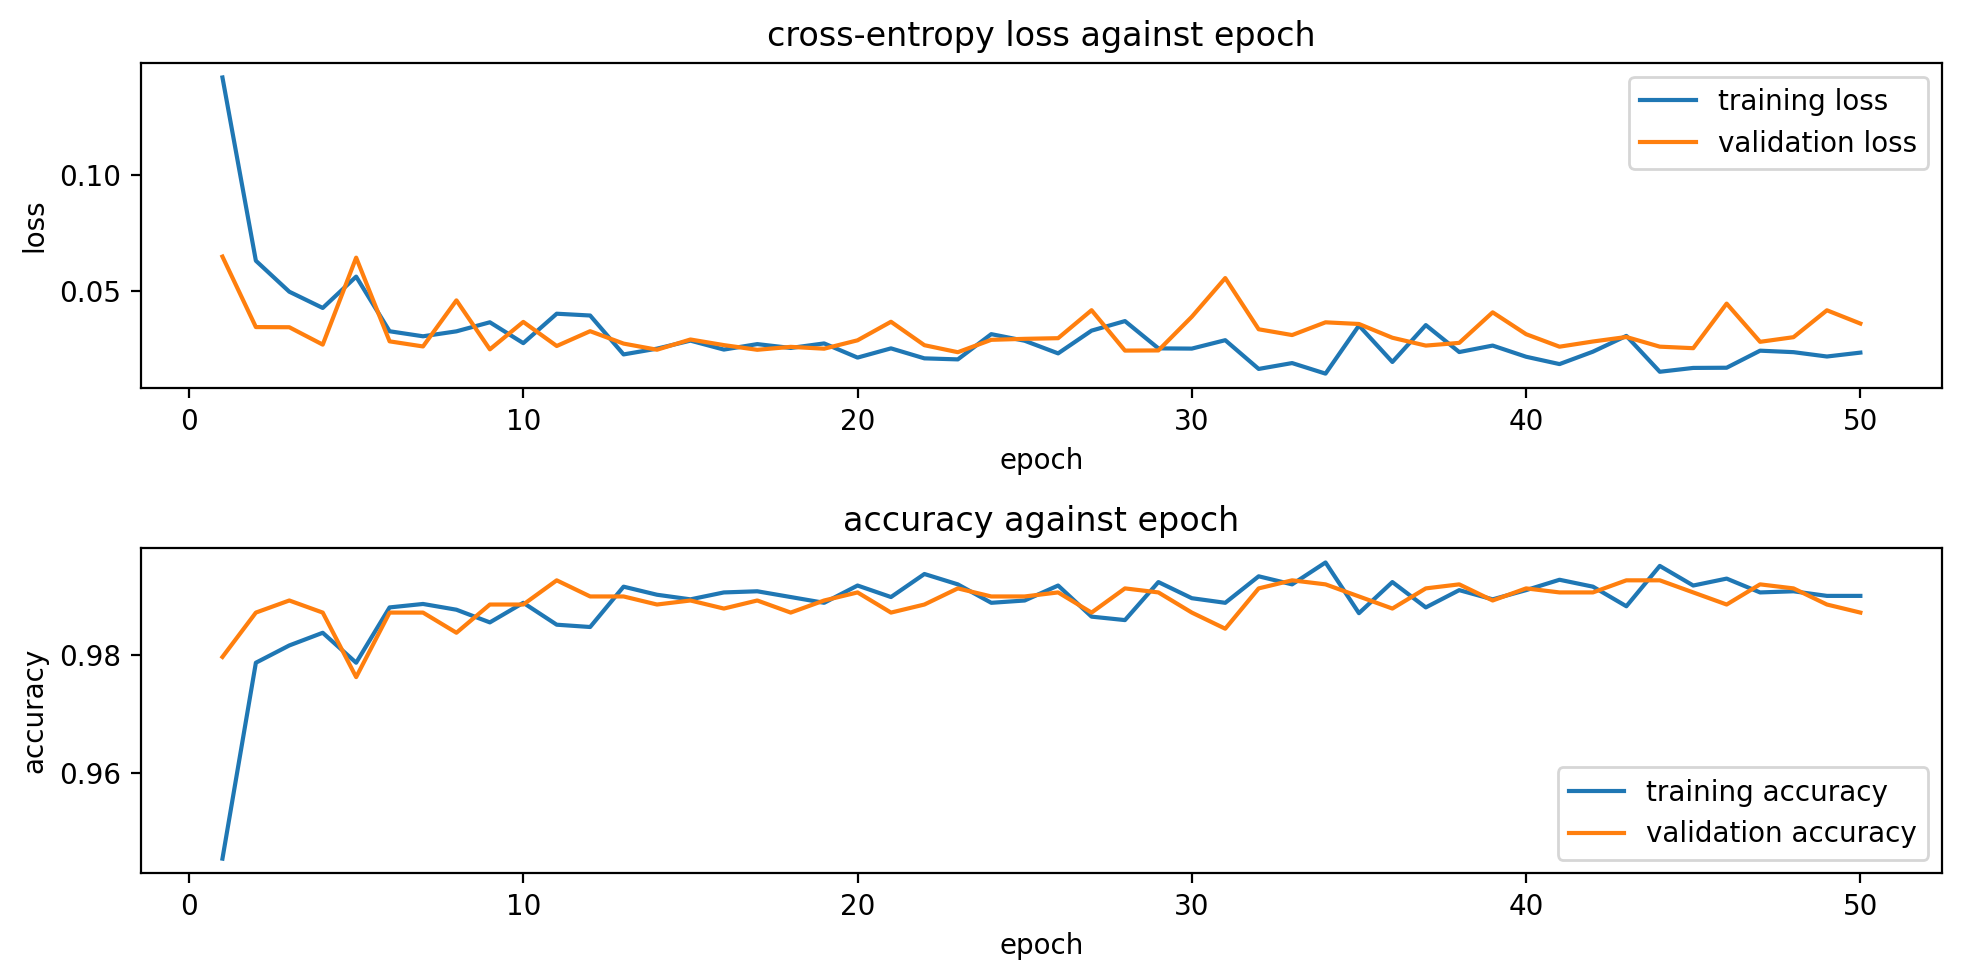

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200
fig, axs = plt.subplots(2)
axs[0].plot(hist['train loss'], label = 'training loss')
axs[0].plot(hist['valid loss'], label = 'validation loss')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].legend()
axs[0].set_title(f'cross-entropy loss against epoch')
axs[1].plot(hist['train acc'], label = 'training accuracy')
axs[1].plot(hist['valid acc'], label = 'validation accuracy')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].legend()
axs[1].set_title(f'accuracy against epoch')
fig.tight_layout()

In [ ]:
model = models.resnet18()
#replace final layer
num_classes = 2
model.fc = nn.Linear(model.fc.in_features,num_classes)
model = model.to(device)
model.load_state_dict(torch.load('/content/gdrive/My Drive/DD2424/catdog_50epochs.pt'))

<All keys matched successfully>

In [ ]:
test_model(model, test_data_loader)

Model achieves accuracy of 0.9904761904761904 on test set


# Breed classification

In [ ]:
train_transform=transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

valid_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [ ]:
#load images
train_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], train_transform)
valid_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)
test_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)

In [ ]:
train_set.__getitem__(6000)

(tensor([[[-0.3541, -0.3198, -0.3369,  ...,  2.1290,  2.1462,  2.1633],
          [-0.5082, -0.4226, -0.4397,  ...,  2.1290,  2.1633,  2.1804],
          [-0.4911, -0.4568, -0.3883,  ...,  2.1119,  2.1633,  2.1975],
          ...,
          [ 0.9303,  0.9132,  0.9132,  ...,  0.1939,  0.1939,  0.1597],
          [ 0.9474,  0.8961,  0.8618,  ...,  0.1597,  0.1597,  0.1939],
          [ 0.8447,  0.8618,  0.8618,  ...,  0.2282,  0.2111,  0.2453]],
 
         [[-0.1625, -0.1800, -0.1450,  ...,  2.2885,  2.3060,  2.3410],
          [-0.2325, -0.2150, -0.2500,  ...,  2.3060,  2.3410,  2.3585],
          [-0.2150, -0.2500, -0.2850,  ...,  2.2885,  2.3410,  2.3761],
          ...,
          [ 1.0280,  1.0105,  1.0105,  ...,  0.3627,  0.3277,  0.3102],
          [ 1.0280,  0.9755,  0.9755,  ...,  0.3277,  0.3102,  0.3102],
          [ 0.9580,  0.9580,  0.9580,  ...,  0.3102,  0.3277,  0.3452]],
 
         [[-0.5670, -0.5147, -0.5321,  ...,  2.6051,  2.5877,  2.5703],
          [-0.5844, -0.5147,

In [ ]:
#train-test split of indices
indices = np.array(range(len(image_labels.index)))

test_ratio = 0.1
valid_ratio = 0.2


non_test_idx, test_idx = train_test_split(indices, test_size = test_ratio, random_state = 1)
train_idx, valid_idx = train_test_split(non_test_idx, test_size = valid_ratio/(1-test_ratio), random_state = 1)


train_set = torch.utils.data.Subset(train_set, train_idx)
valid_set = torch.utils.data.Subset(valid_set, valid_idx)
test_set = torch.utils.data.Subset(test_set, test_idx)

print(f'train set has size of {len(train_set)}')
print(f'valid set has size of {len(valid_set)}')
print(f'test set has size of {len(test_set)}')

train set has size of 5144
valid set has size of 1470
test set has size of 735


In [ ]:
train_data_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle=True, num_workers = 4)
valid_data_loader = torch.utils.data.DataLoader(valid_set, batch_size = 64, shuffle=True, num_workers = 4)
test_data_loader = torch.utils.data.DataLoader(test_set, batch_size = 64, shuffle=True, num_workers = 4)
train_valid_loaders = {'train':train_data_loader, 'validation':valid_data_loader}
train_valid_sizes = {'train':len(train_set), 'validation':len(valid_set)}

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
#check if gpu avail
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
#send model to device
weights = models.ResNet18_Weights.DEFAULT
model_0.0001, model_0.003, model_0.001 = models.resnet18(weights)
model = model.to(device)
#define loss fn
loss = nn.CrossEntropyLoss()
#feature extracting or finetuning
feature_extraction = True



cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [ ]:
#we want all to requires_grad if fine tuning, but only new top layer to requires_grad if feature extracting
set_parameter_requires_grad(model, feature_extraction)

In [ ]:
#replace final layer
num_classes = 37
model.fc = nn.Linear(model.fc.in_features,num_classes)
model = model.to(device)

In [ ]:
optimizer = optim.Adam(get_params_learn(model), lr = 0.003)

	 fc.weight
	 fc.bias


In [ ]:
model_base, hist_base = train_model(model, {'train':train_data_loader, 'validation':valid_data_loader}, loss, optimizer, 50)

_______________
Epoch 1 of 50
_______________
For train set:  
Loss: 1.1680523973786812 
Accuracy: 0.7047045101088647


For validation set:  
Loss: 0.4462644469575817 
Accuracy: 0.8816326530612244


_______________
Epoch 2 of 50
_______________
For train set:  
Loss: 0.37733839697915694 
Accuracy: 0.89599533437014


For validation set:  
Loss: 0.34327017454063 
Accuracy: 0.8918367346938775


_______________
Epoch 3 of 50
_______________
For train set:  
Loss: 0.27800657775131393 
Accuracy: 0.9249611197511665


For validation set:  
Loss: 0.3314861686862245 
Accuracy: 0.9006802721088435


_______________
Epoch 4 of 50
_______________
For train set:  
Loss: 0.23277137174762055 
Accuracy: 0.9344867807153966


For validation set:  
Loss: 0.3161280793803079 
Accuracy: 0.9020408163265305


_______________
Epoch 5 of 50
_______________
For train set:  
Loss: 0.20111234694672966 
Accuracy: 0.942651632970451


For validation set:  
Loss: 0.2707999840074656 
Accuracy: 0.9217687074829931


______

In [ ]:
torch.save(model_base.state_dict(), '/content/gdrive/My Drive/DD2424/breeds_50epochs.pt')
hist_base.to_csv('/content/gdrive/My Drive/DD2424/breeds_50epochs_hist.csv')

In [ ]:
hist_base.head()

,train loss,train acc,valid loss,valid acc
1,1.168052,0.7047045101088647,0.446264,0.8816326530612244
2,0.377338,0.89599533437014,0.34327,0.8918367346938775
3,0.278007,0.9249611197511665,0.331486,0.9006802721088435
4,0.232771,0.9344867807153966,0.316128,0.9020408163265305
5,0.201112,0.942651632970451,0.2708,0.9217687074829931


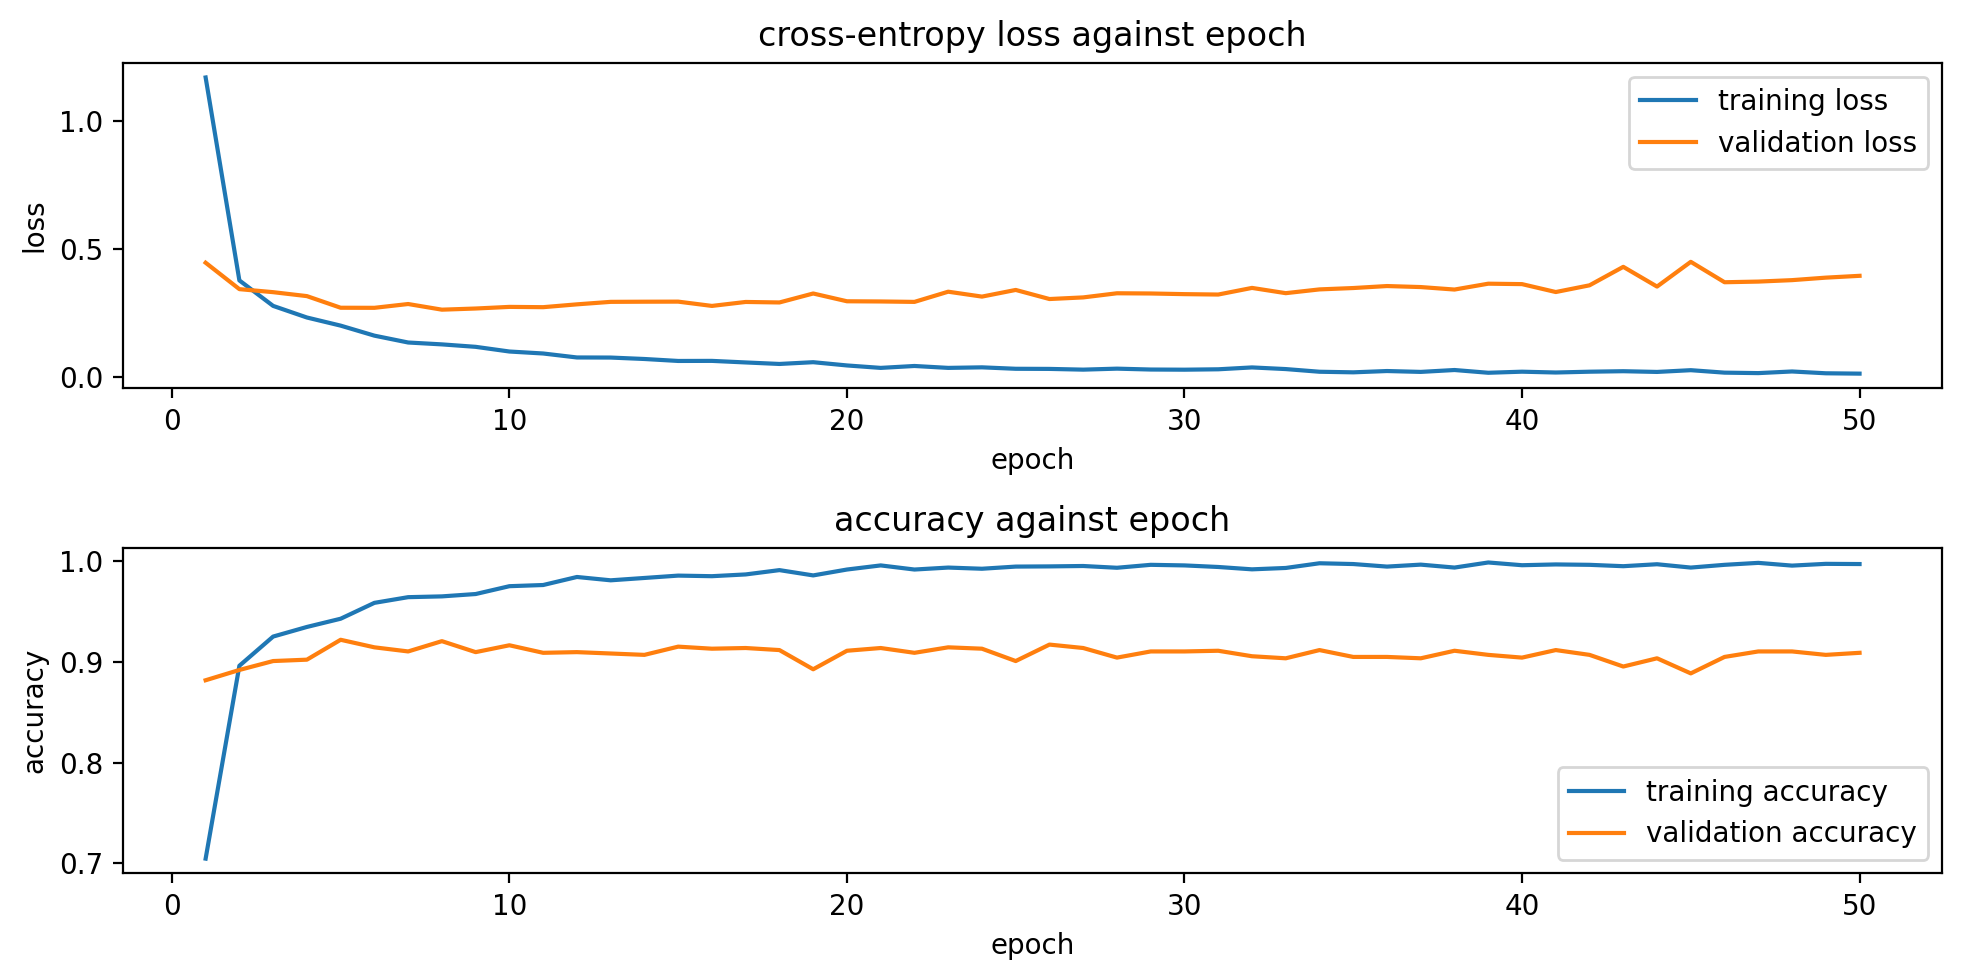

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200
fig, axs = plt.subplots(2)
axs[0].plot(hist_base['train loss'], label = 'training loss')
axs[0].plot(hist_base['valid loss'], label = 'validation loss')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].legend()
axs[0].set_title(f'cross-entropy loss against epoch')
axs[1].plot(hist_base['train acc'], label = 'training accuracy')
axs[1].plot(hist_base['valid acc'], label = 'validation accuracy')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].legend()
axs[1].set_title(f'accuracy against epoch')
fig.tight_layout()

In [ ]:
test_model(model, test_data_loader)

Model achieves accuracy of 0.8829931972789115 on test set


cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


	 fc.weight
	 fc.bias
Training with learning rate of 1e-05
_______________
Epoch 1 of 25
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 3.664093564494772 
Accuracy: 0.030132192846034214


For validation set:  
Loss: 3.6273898614507143 
Accuracy: 0.03673469387755102


_______________
Epoch 2 of 25
_______________
For train set:  
Loss: 3.570967714300793 
Accuracy: 0.0375194401244168


For validation set:  
Loss: 3.536056913972712 
Accuracy: 0.050340136054421766


_______________
Epoch 3 of 25
_______________
For train set:  
Loss: 3.489870998388501 
Accuracy: 0.05112752721617418


For validation set:  
Loss: 3.4585582165491013 
Accuracy: 0.06530612244897958


_______________
Epoch 4 of 25
_______________
For train set:  
Loss: 3.4133476369303084 
Accuracy: 0.07192846034214619


For validation set:  
Loss: 3.3851753397052793 
Accuracy: 0.09047619047619047


_______________
Epoch 5 of 25
_______________
For train set:  
Loss: 3.343234915014003 
Accuracy: 0.09953343701399689


For validation set:  
Loss: 3.313159141735155 
Accuracy: 0.11020408163265305


_______________
Epoch 6 of 25
_______________


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


	 fc.weight
	 fc.bias
Training with learning rate of 1.6681005372000593e-05
_______________
Epoch 1 of 25
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 3.739363305490829 
Accuracy: 0.03188180404354588


For validation set:  
Loss: 3.6441622539442413 
Accuracy: 0.04217687074829932


_______________
Epoch 2 of 25
_______________
For train set:  
Loss: 3.568376410619282 
Accuracy: 0.045489891135303266


For validation set:  
Loss: 3.497291355068181 
Accuracy: 0.07210884353741497


_______________
Epoch 3 of 25
_______________
For train set:  
Loss: 3.4364445584002032 
Accuracy: 0.07601088646967341


For validation set:  
Loss: 3.3765885739099413 
Accuracy: 0.11360544217687074


_______________
Epoch 4 of 25
_______________
For train set:  
Loss: 3.3174947279608267 
Accuracy: 0.12013996889580093


For validation set:  
Loss: 3.2615414145852433 
Accuracy: 0.14965986394557823


_______________
Epoch 5 of 25
_______________
For train set:  
Loss: 3.213372767064286 
Accuracy: 0.16854587869362364


For validation set:  
Loss: 3.155183641602393 
Accuracy: 0.19795918367346937


_______________
Epoch 6 of 25
_______________

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


	 fc.weight
	 fc.bias
Training with learning rate of 2.782559402207126e-05
_______________
Epoch 1 of 25
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 3.650056232375268 
Accuracy: 0.04393468118195956


For validation set:  
Loss: 3.543267737602701 
Accuracy: 0.06530612244897958


_______________
Epoch 2 of 25
_______________
For train set:  
Loss: 3.42908827661541 
Accuracy: 0.09253499222395023


For validation set:  
Loss: 3.3415195744053845 
Accuracy: 0.11768707482993196


_______________
Epoch 3 of 25
_______________
For train set:  
Loss: 3.2434991125370813 
Accuracy: 0.15707620528771385


For validation set:  
Loss: 3.1646356660492567 
Accuracy: 0.17959183673469387


_______________
Epoch 4 of 25
_______________
For train set:  
Loss: 3.0722189913641422 
Accuracy: 0.24766718506998445


For validation set:  
Loss: 2.995176738946616 
Accuracy: 0.26666666666666666


_______________
Epoch 5 of 25
_______________
For train set:  
Loss: 2.912022592120371 
Accuracy: 0.3347589424572317


For validation set:  
Loss: 2.8337520304180326 
Accuracy: 0.3496598639455782


_______________
Epoch 6 of 25
_______________
For

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


	 fc.weight
	 fc.bias
Training with learning rate of 4.641588833612782e-05
_______________
Epoch 1 of 25
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 3.5888356965956385 
Accuracy: 0.04821150855365474


For validation set:  
Loss: 3.4088296342058246 
Accuracy: 0.08775510204081632


_______________
Epoch 2 of 25
_______________
For train set:  
Loss: 3.26434813502417 
Accuracy: 0.14307931570762053


For validation set:  
Loss: 3.111760474873238 
Accuracy: 0.21768707482993196


_______________
Epoch 3 of 25
_______________
For train set:  
Loss: 2.985623750123043 
Accuracy: 0.2801321928460342


For validation set:  
Loss: 2.840151636616713 
Accuracy: 0.34897959183673466


_______________
Epoch 4 of 25
_______________
For train set:  
Loss: 2.7319035982455286 
Accuracy: 0.4109642301710731


For validation set:  
Loss: 2.5984455744425454 
Accuracy: 0.4727891156462585


_______________
Epoch 5 of 25
_______________
For train set:  
Loss: 2.501869807161773 
Accuracy: 0.5359642301710731


For validation set:  
Loss: 2.3738829554343712 
Accuracy: 0.564625850340136


_______________
Epoch 6 of 25
_______________
For tra

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


	 fc.weight
	 fc.bias
Training with learning rate of 7.742636826811278e-05
_______________
Epoch 1 of 25
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 3.5361396350534298 
Accuracy: 0.07017884914463453


For validation set:  
Loss: 3.227078749209034 
Accuracy: 0.16802721088435374


_______________
Epoch 2 of 25
_______________
For train set:  
Loss: 3.0235666691051857 
Accuracy: 0.27196734059097977


For validation set:  
Loss: 2.763155017580305 
Accuracy: 0.40680272108843535


_______________
Epoch 3 of 25
_______________
For train set:  
Loss: 2.608235807107359 
Accuracy: 0.4832814930015552


For validation set:  
Loss: 2.370521930123673 
Accuracy: 0.5938775510204081


_______________
Epoch 4 of 25
_______________
For train set:  
Loss: 2.2550405291710076 
Accuracy: 0.6415241057542769


For validation set:  
Loss: 2.0586285604100647 
Accuracy: 0.6870748299319728


_______________
Epoch 5 of 25
_______________
For train set:  
Loss: 1.9632215642632445 
Accuracy: 0.7262830482115086


For validation set:  
Loss: 1.7952683484473195 
Accuracy: 0.7557823129251701


_______________
Epoch 6 of 25
_______________
For t

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


	 fc.weight
	 fc.bias
Training with learning rate of 0.0001291549665014884
_______________
Epoch 1 of 25
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 3.3413835272633268 
Accuracy: 0.15241057542768274


For validation set:  
Loss: 2.910633537396282 
Accuracy: 0.3333333333333333


_______________
Epoch 2 of 25
_______________
For train set:  
Loss: 2.594878424752741 
Accuracy: 0.4819206842923795


For validation set:  
Loss: 2.2552738689240956 
Accuracy: 0.6129251700680272


_______________
Epoch 3 of 25
_______________
For train set:  
Loss: 2.040206788301839 
Accuracy: 0.6947900466562986


For validation set:  
Loss: 1.7859068502374247 
Accuracy: 0.7231292517006802


_______________
Epoch 4 of 25
_______________
For train set:  
Loss: 1.6502461112676474 
Accuracy: 0.776049766718507


For validation set:  
Loss: 1.4563834000606926 
Accuracy: 0.7965986394557822


_______________
Epoch 5 of 25
_______________
For train set:  
Loss: 1.3686970746721117 
Accuracy: 0.8153188180404355


For validation set:  
Loss: 1.2282564187536433 
Accuracy: 0.8299319727891156


_______________
Epoch 6 of 25
_______________
For trai

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


	 fc.weight
	 fc.bias
Training with learning rate of 0.00021544346900318823
_______________
Epoch 1 of 25
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 3.082934897201799 
Accuracy: 0.2468895800933126


For validation set:  
Loss: 2.4539926045605926 
Accuracy: 0.5231292517006803


_______________
Epoch 2 of 25
_______________
For train set:  
Loss: 2.0536695868935593 
Accuracy: 0.6648522550544324


For validation set:  
Loss: 1.6653776154226185 
Accuracy: 0.7448979591836734


_______________
Epoch 3 of 25
_______________
For train set:  
Loss: 1.4537059293008332 
Accuracy: 0.7987947122861586


For validation set:  
Loss: 1.2239203569840411 
Accuracy: 0.8374149659863945


_______________
Epoch 4 of 25
_______________
For train set:  
Loss: 1.1117491606234762 
Accuracy: 0.8442846034214619


For validation set:  
Loss: 0.9699556778888313 
Accuracy: 0.8700680272108843


_______________
Epoch 5 of 25
_______________
For train set:  
Loss: 0.9073375492222017 
Accuracy: 0.869945567651633


For validation set:  
Loss: 0.8091256499290467 
Accuracy: 0.873469387755102


_______________
Epoch 6 of 25
_______________
For trai

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


	 fc.weight
	 fc.bias
Training with learning rate of 0.00035938136638046257
_______________
Epoch 1 of 25
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 2.689865087832485 
Accuracy: 0.4119362363919129


For validation set:  
Loss: 1.828204117178106 
Accuracy: 0.7170068027210884


_______________
Epoch 2 of 25
_______________
For train set:  
Loss: 1.4565338584164254 
Accuracy: 0.7855754276827371


For validation set:  
Loss: 1.090285231467007 
Accuracy: 0.8292517006802721


_______________
Epoch 3 of 25
_______________
For train set:  
Loss: 0.9658341275218115 
Accuracy: 0.8569206842923794


For validation set:  
Loss: 0.7969437968974211 
Accuracy: 0.8755102040816326


_______________
Epoch 4 of 25
_______________
For train set:  
Loss: 0.7350407211257732 
Accuracy: 0.88549766718507


For validation set:  
Loss: 0.6500896049194596 
Accuracy: 0.8877551020408163


_______________
Epoch 5 of 25
_______________
For train set:  
Loss: 0.6115179586095351 
Accuracy: 0.8963841368584758


For validation set:  
Loss: 0.5620224128775045 
Accuracy: 0.8931972789115645


_______________
Epoch 6 of 25
_______________
For train 

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


	 fc.weight
	 fc.bias
Training with learning rate of 0.0005994842503189409
_______________
Epoch 1 of 25
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 2.3670362647547507 
Accuracy: 0.48755832037325036


For validation set:  
Loss: 1.3054067496539785 
Accuracy: 0.8136054421768707


_______________
Epoch 2 of 25
_______________
For train set:  
Loss: 1.0061217634525863 
Accuracy: 0.8493390357698289


For validation set:  
Loss: 0.7398588830921926 
Accuracy: 0.8857142857142857


_______________
Epoch 3 of 25
_______________
For train set:  
Loss: 0.6624568414354398 
Accuracy: 0.8823872472783826


For validation set:  
Loss: 0.5677998724437895 
Accuracy: 0.9006802721088435


_______________
Epoch 4 of 25
_______________
For train set:  
Loss: 0.5218572970682503 
Accuracy: 0.8996889580093312


For validation set:  
Loss: 0.4644061563777275 
Accuracy: 0.9108843537414966


_______________
Epoch 5 of 25
_______________
For train set:  
Loss: 0.4382129623489469 
Accuracy: 0.9121306376360808


For validation set:  
Loss: 0.41349140661103384 
Accuracy: 0.9122448979591836


_______________
Epoch 6 of 25
_______________
For

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


	 fc.weight
	 fc.bias
Training with learning rate of 0.001
_______________
Epoch 1 of 25
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 1.8774567451299071 
Accuracy: 0.5900077760497667


For validation set:  
Loss: 0.8637897973157922 
Accuracy: 0.8374149659863945


_______________
Epoch 2 of 25
_______________
For train set:  
Loss: 0.6847018580043668 
Accuracy: 0.8678071539657853


For validation set:  
Loss: 0.5374418025925046 
Accuracy: 0.8857142857142857


_______________
Epoch 3 of 25
_______________
For train set:  
Loss: 0.47624959290305713 
Accuracy: 0.8991057542768274


For validation set:  
Loss: 0.41865967771633955 
Accuracy: 0.9020408163265305


_______________
Epoch 4 of 25
_______________
For train set:  
Loss: 0.37543470028955866 
Accuracy: 0.9195178849144634


For validation set:  
Loss: 0.38152660094961827 
Accuracy: 0.9027210884353741


_______________
Epoch 5 of 25
_______________
For train set:  
Loss: 0.32750983093611746 
Accuracy: 0.9247667185069984


For validation set:  
Loss: 0.3479302139509292 
Accuracy: 0.91156462585034


_______________
Epoch 6 of 25
_______________
Fo

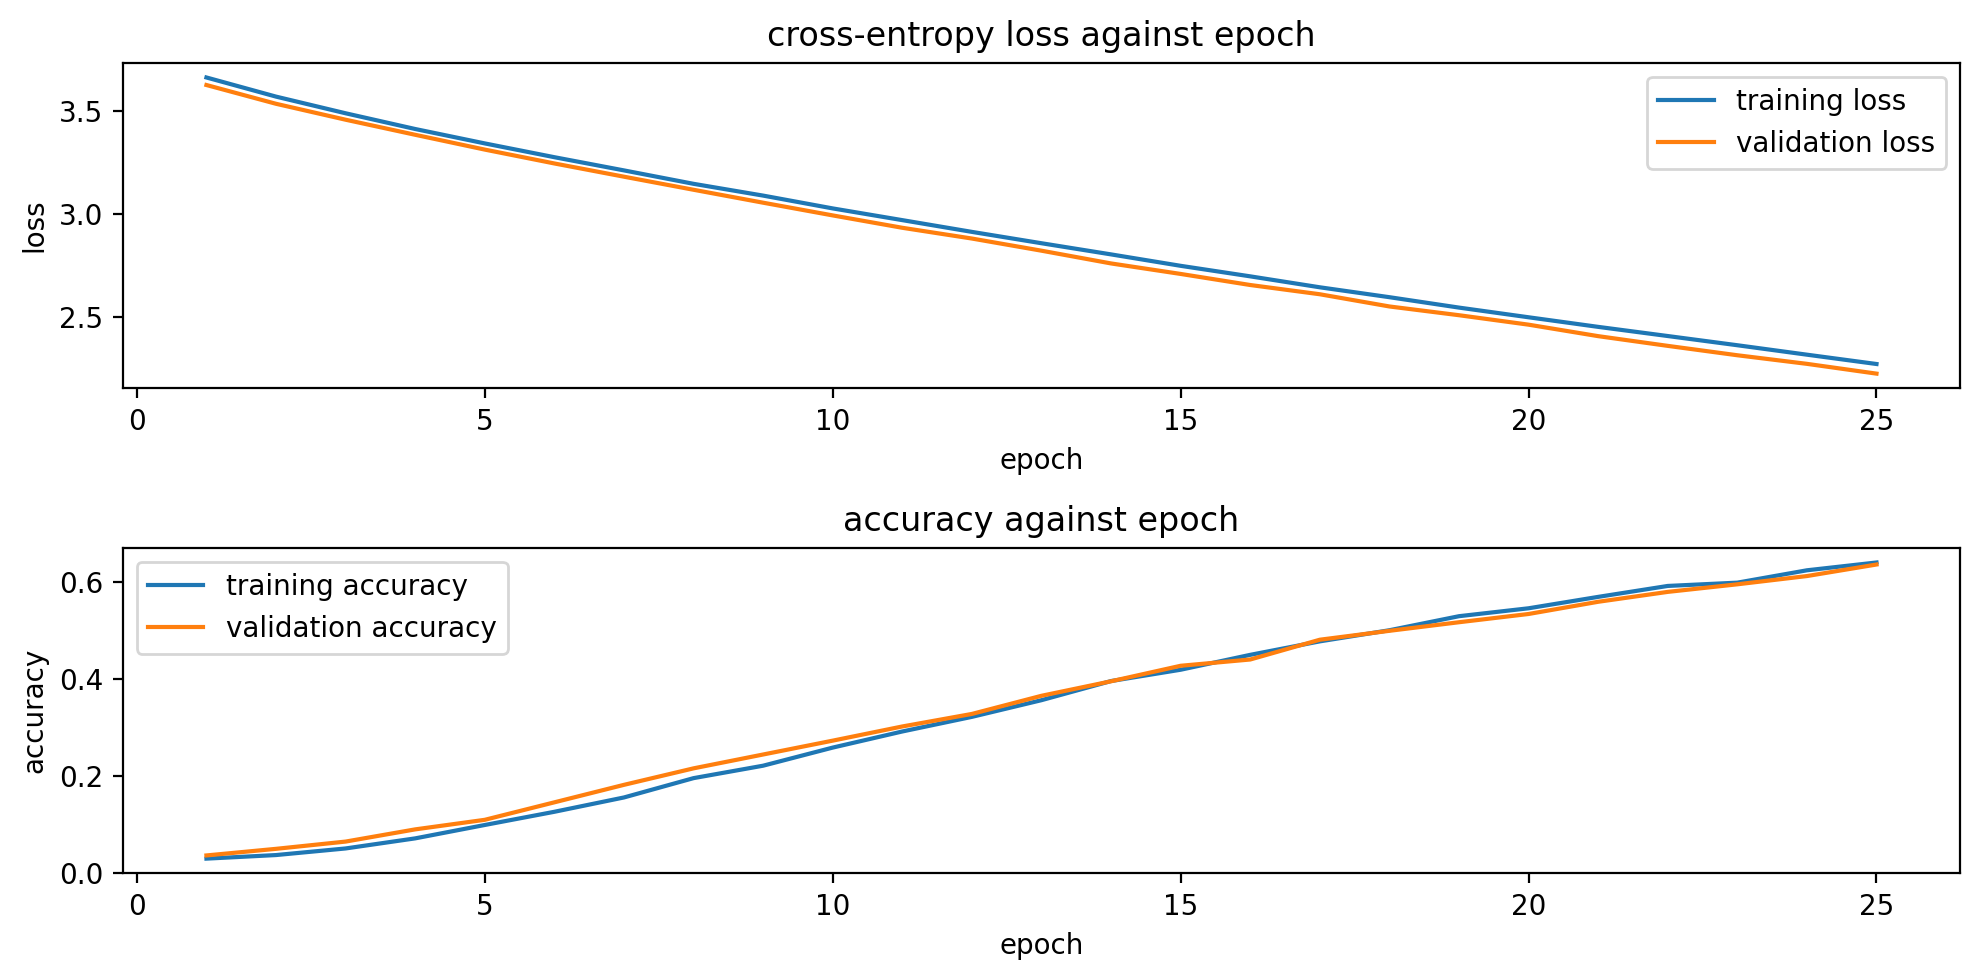

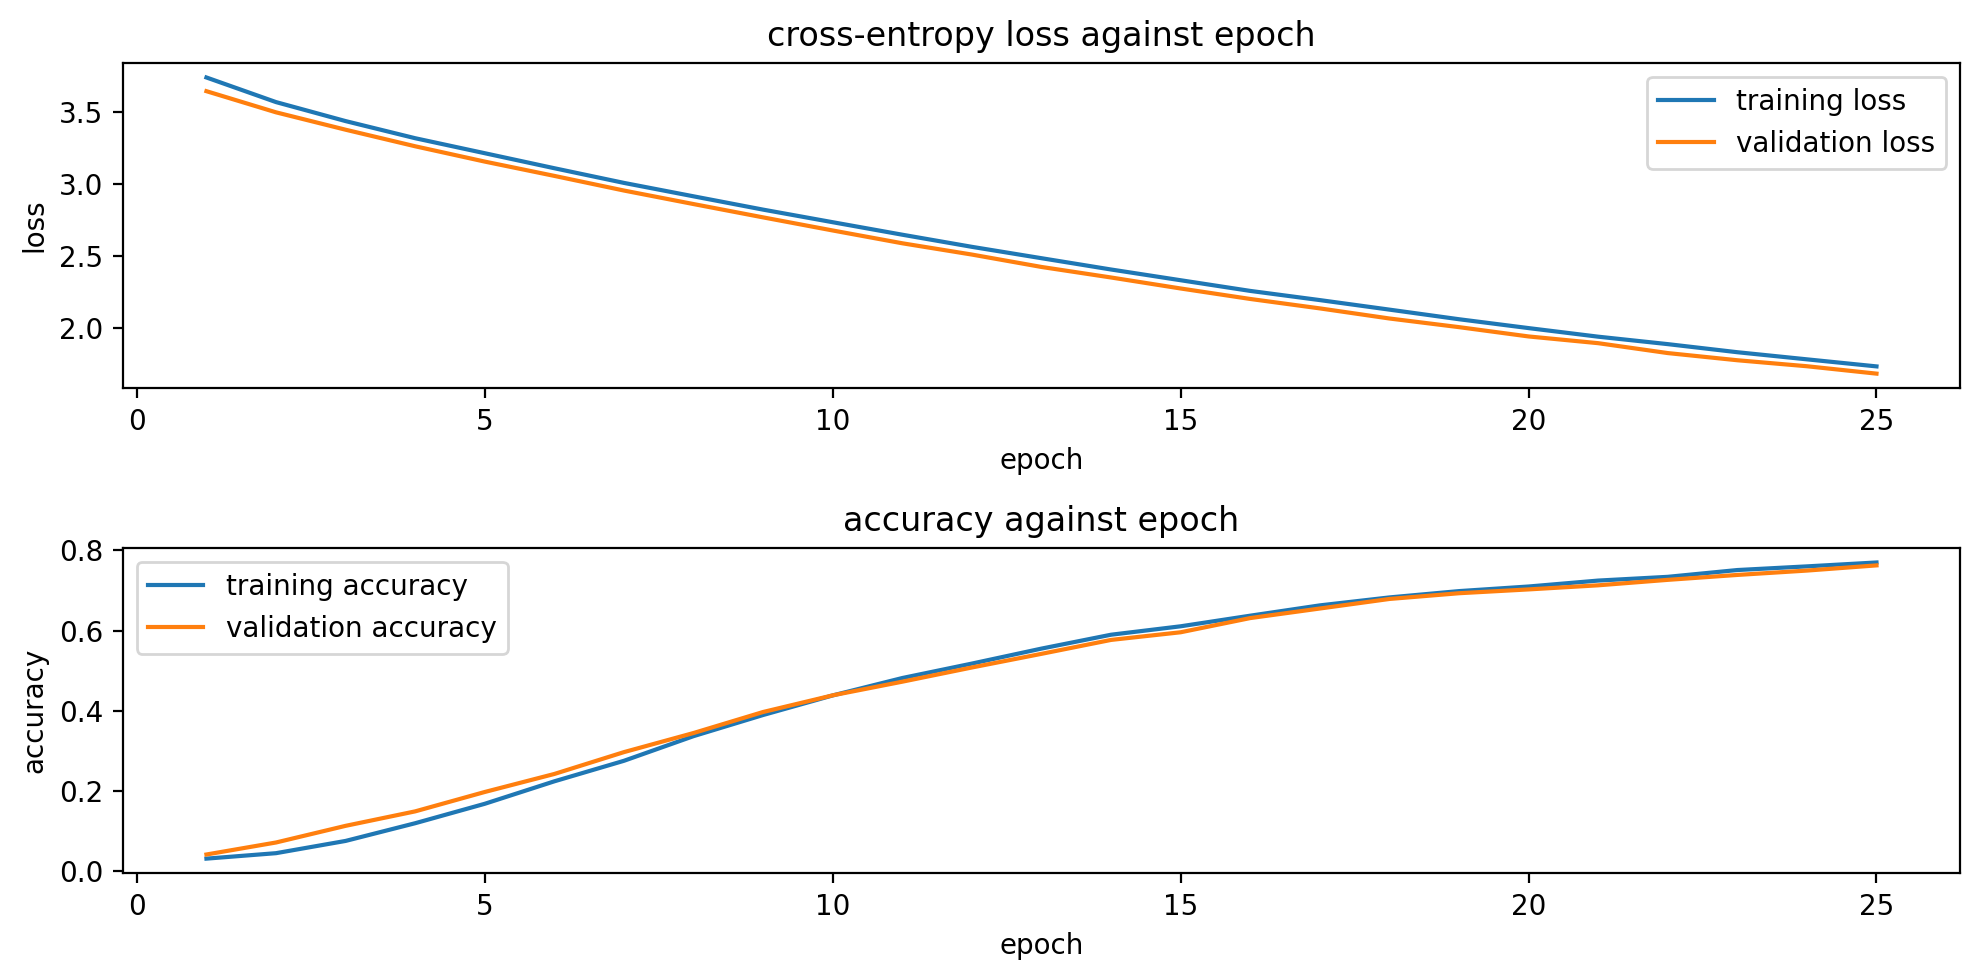

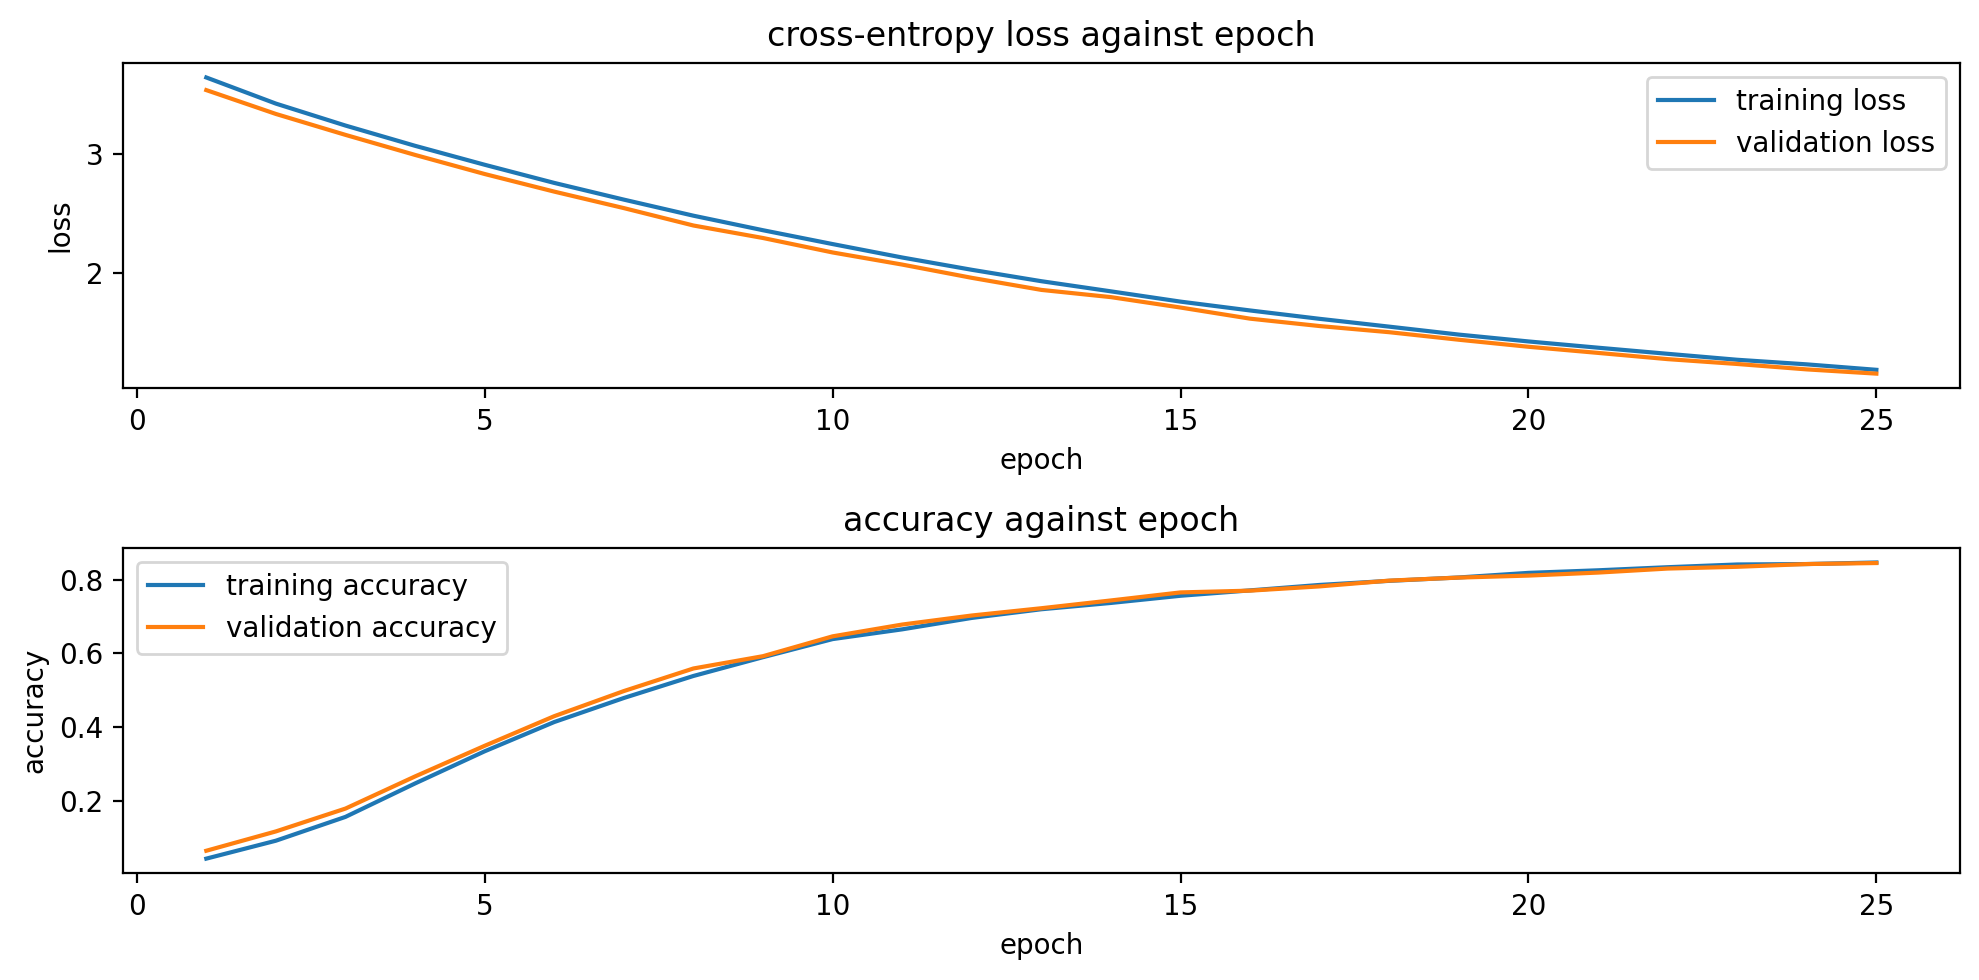

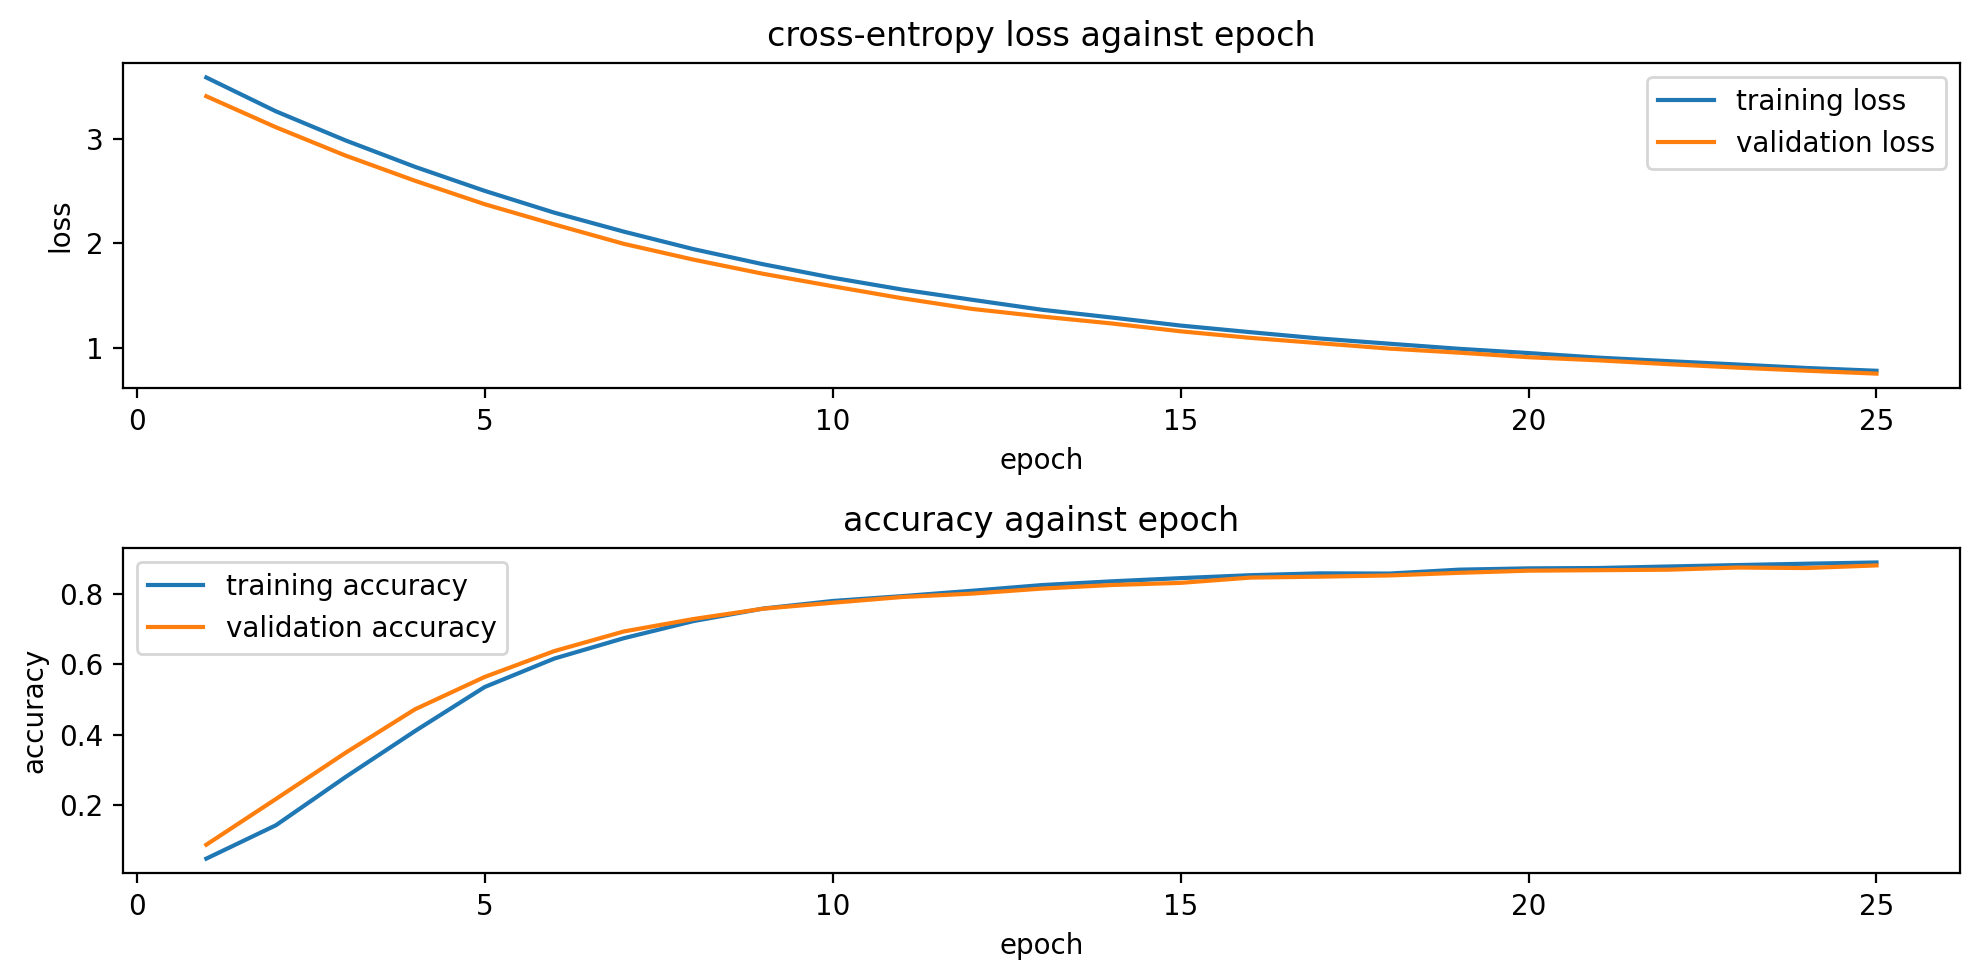

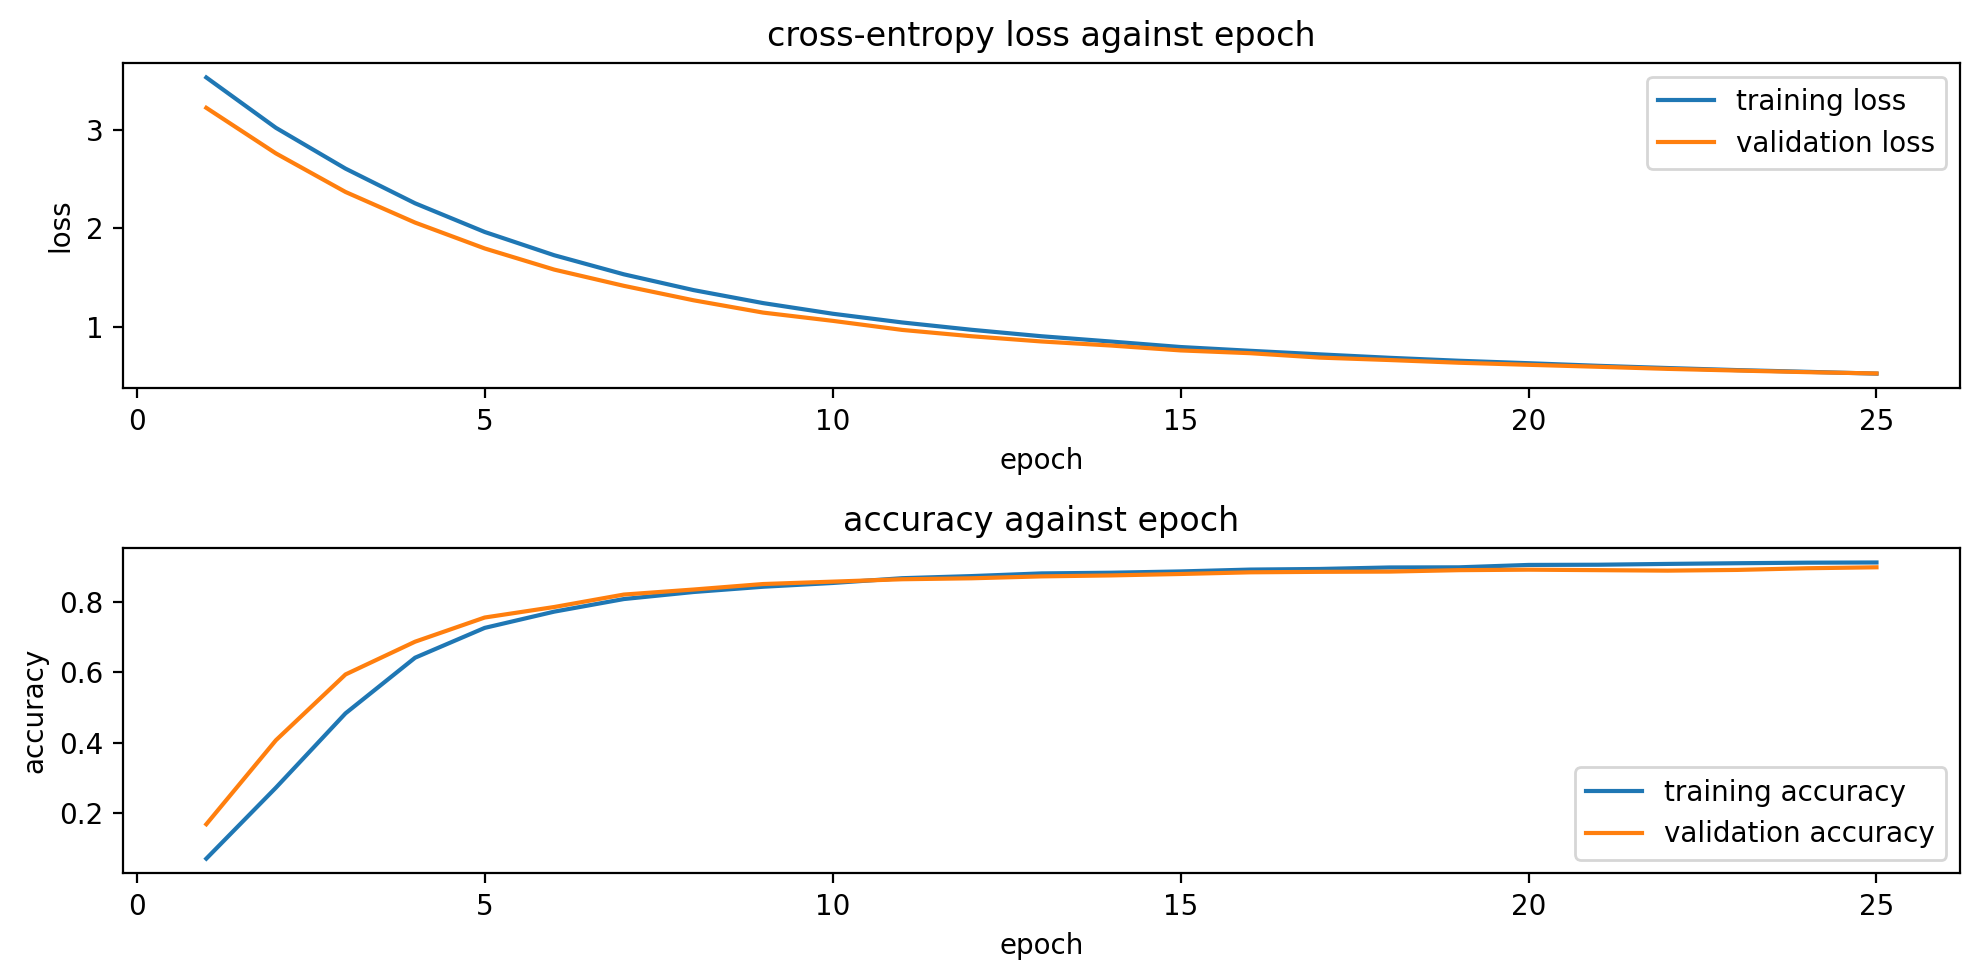

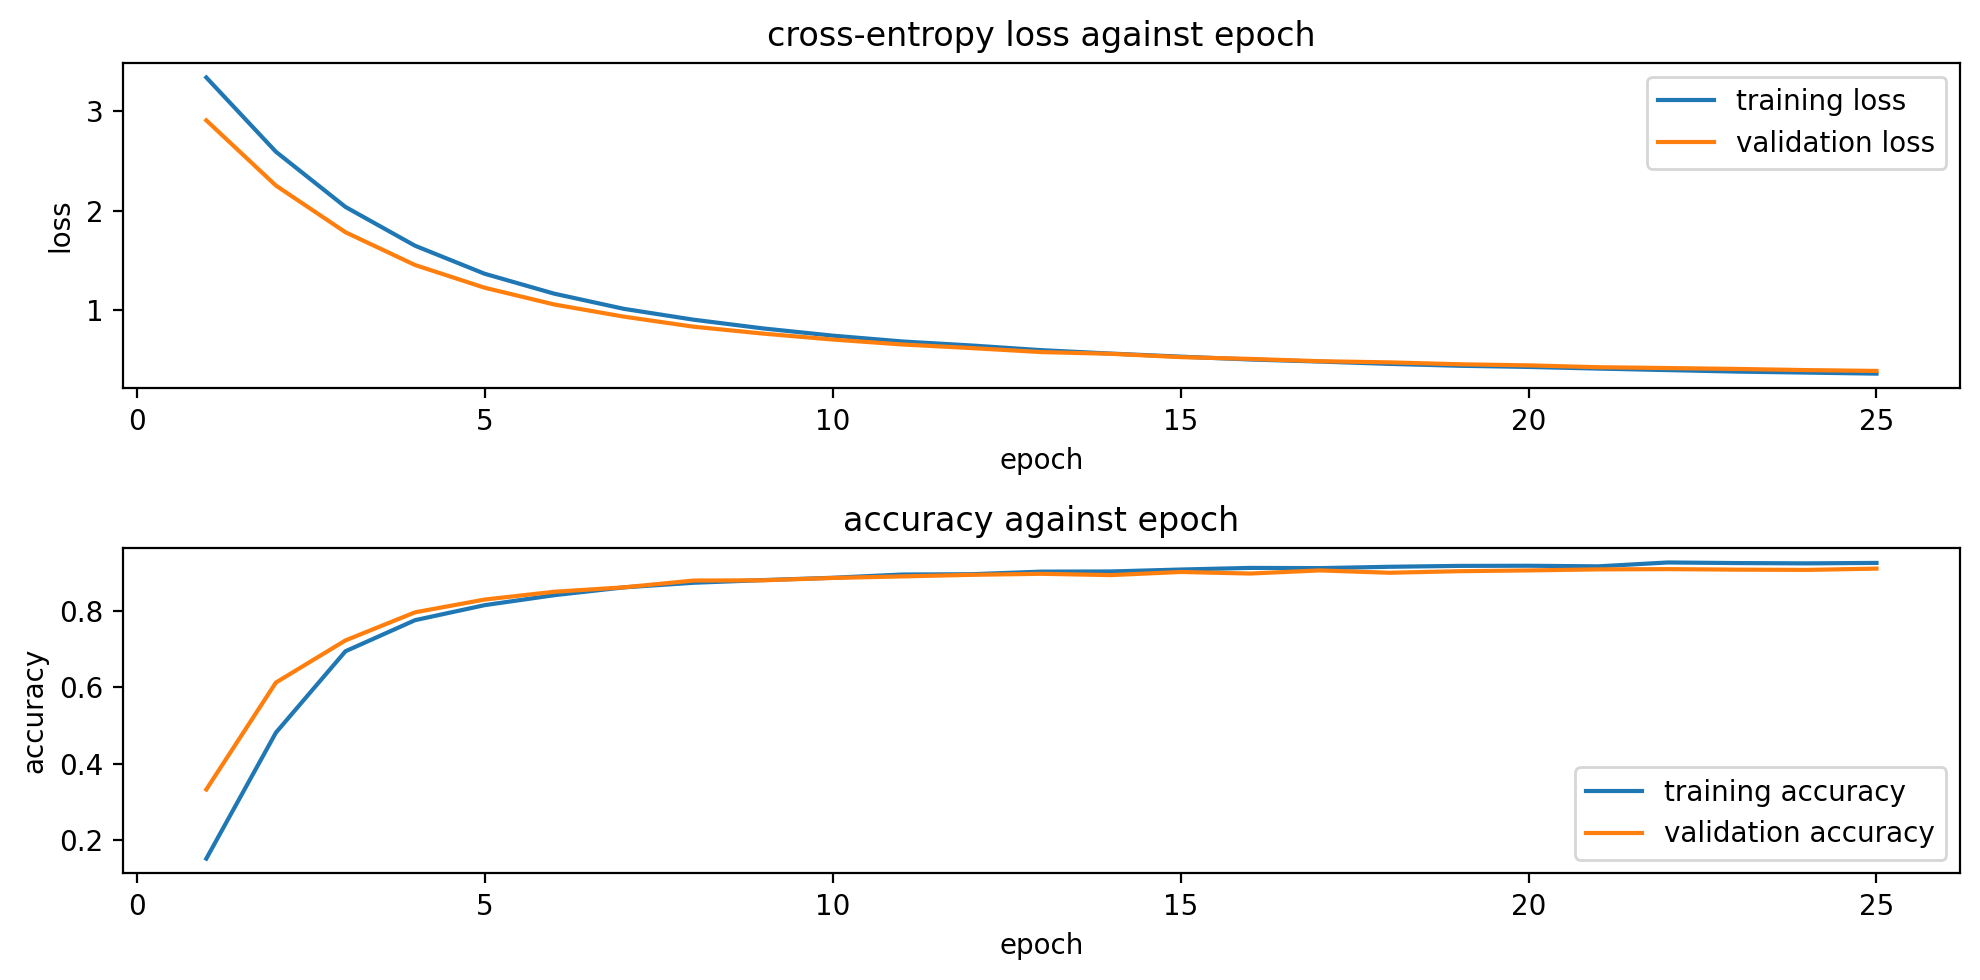

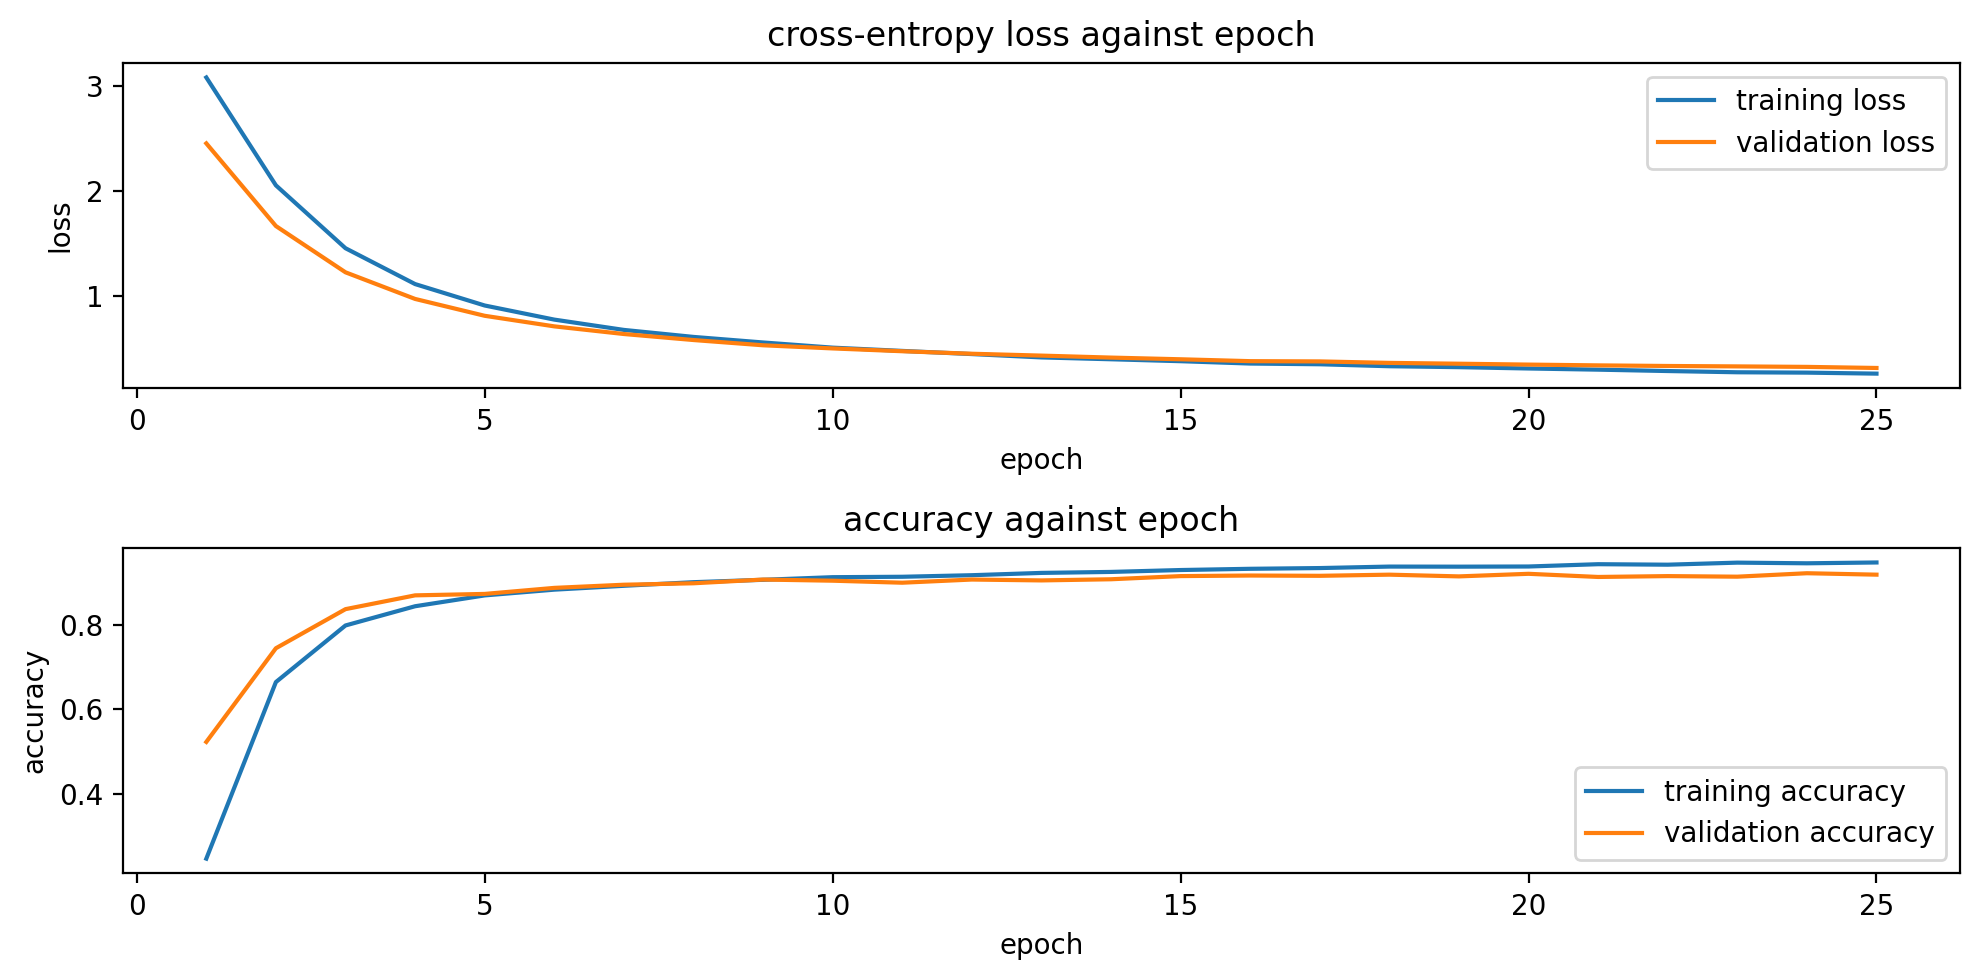

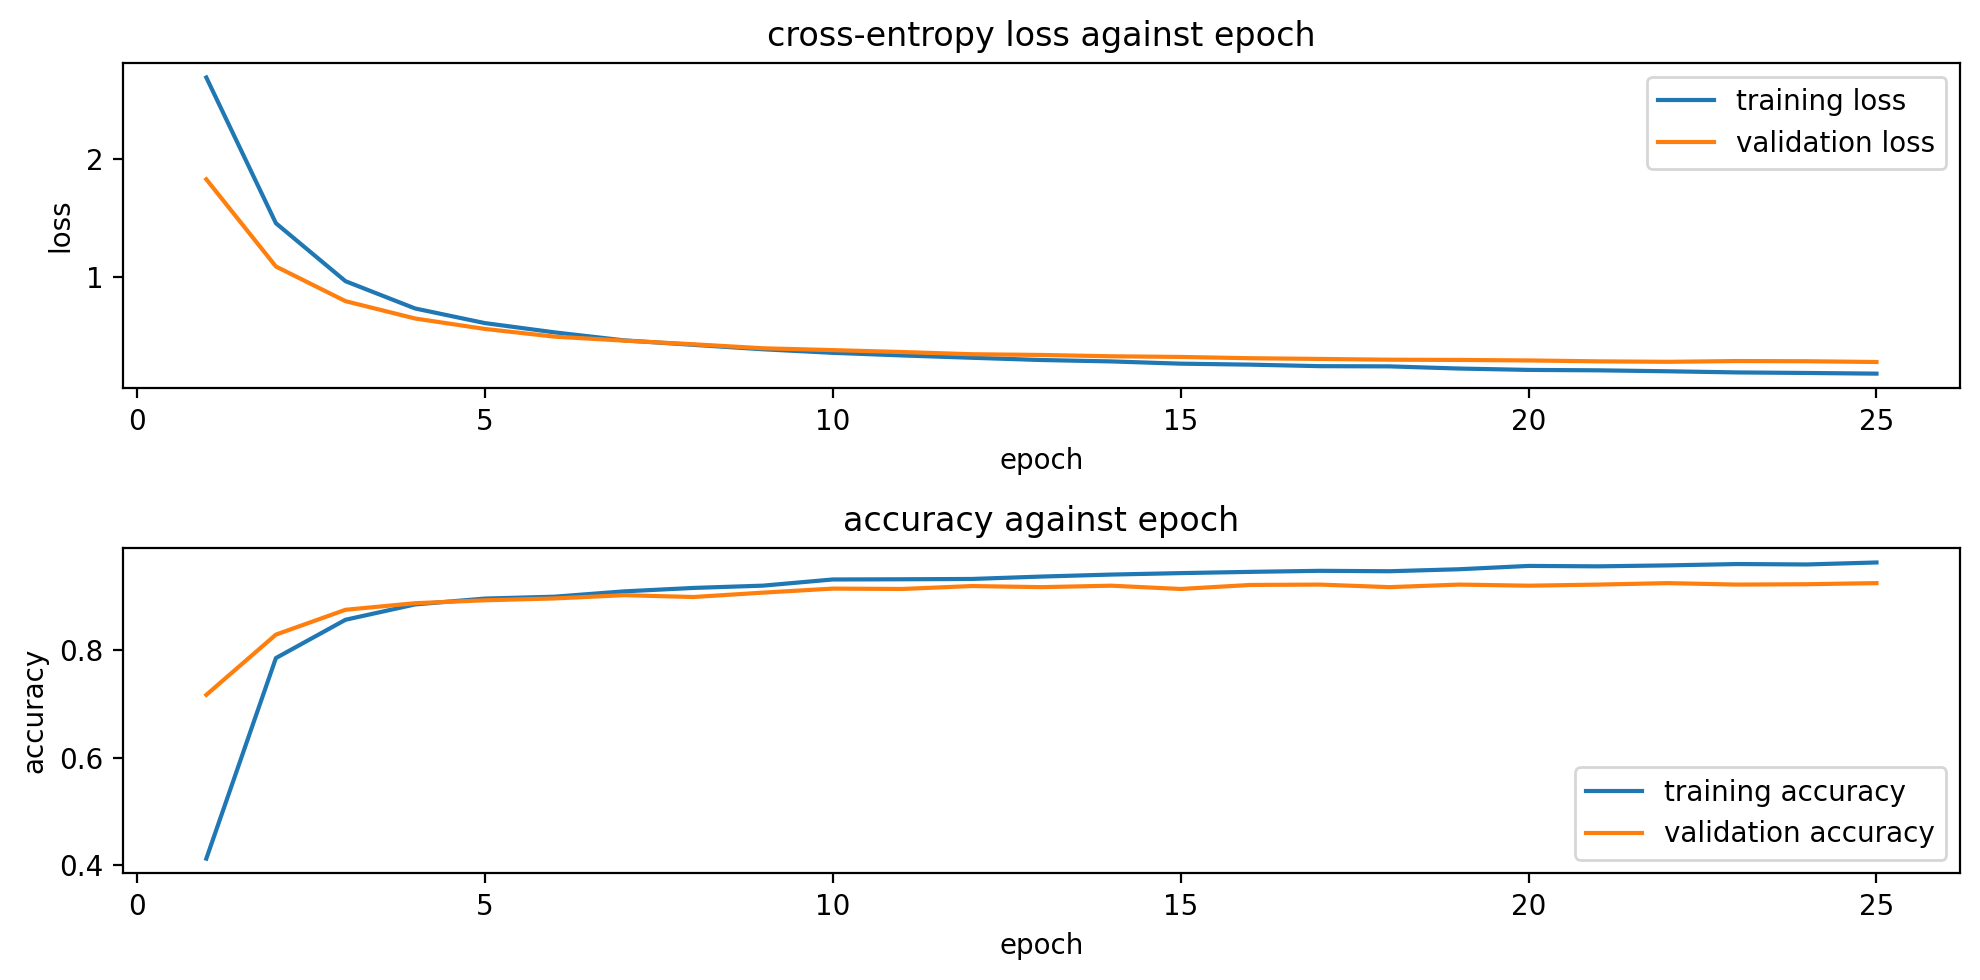

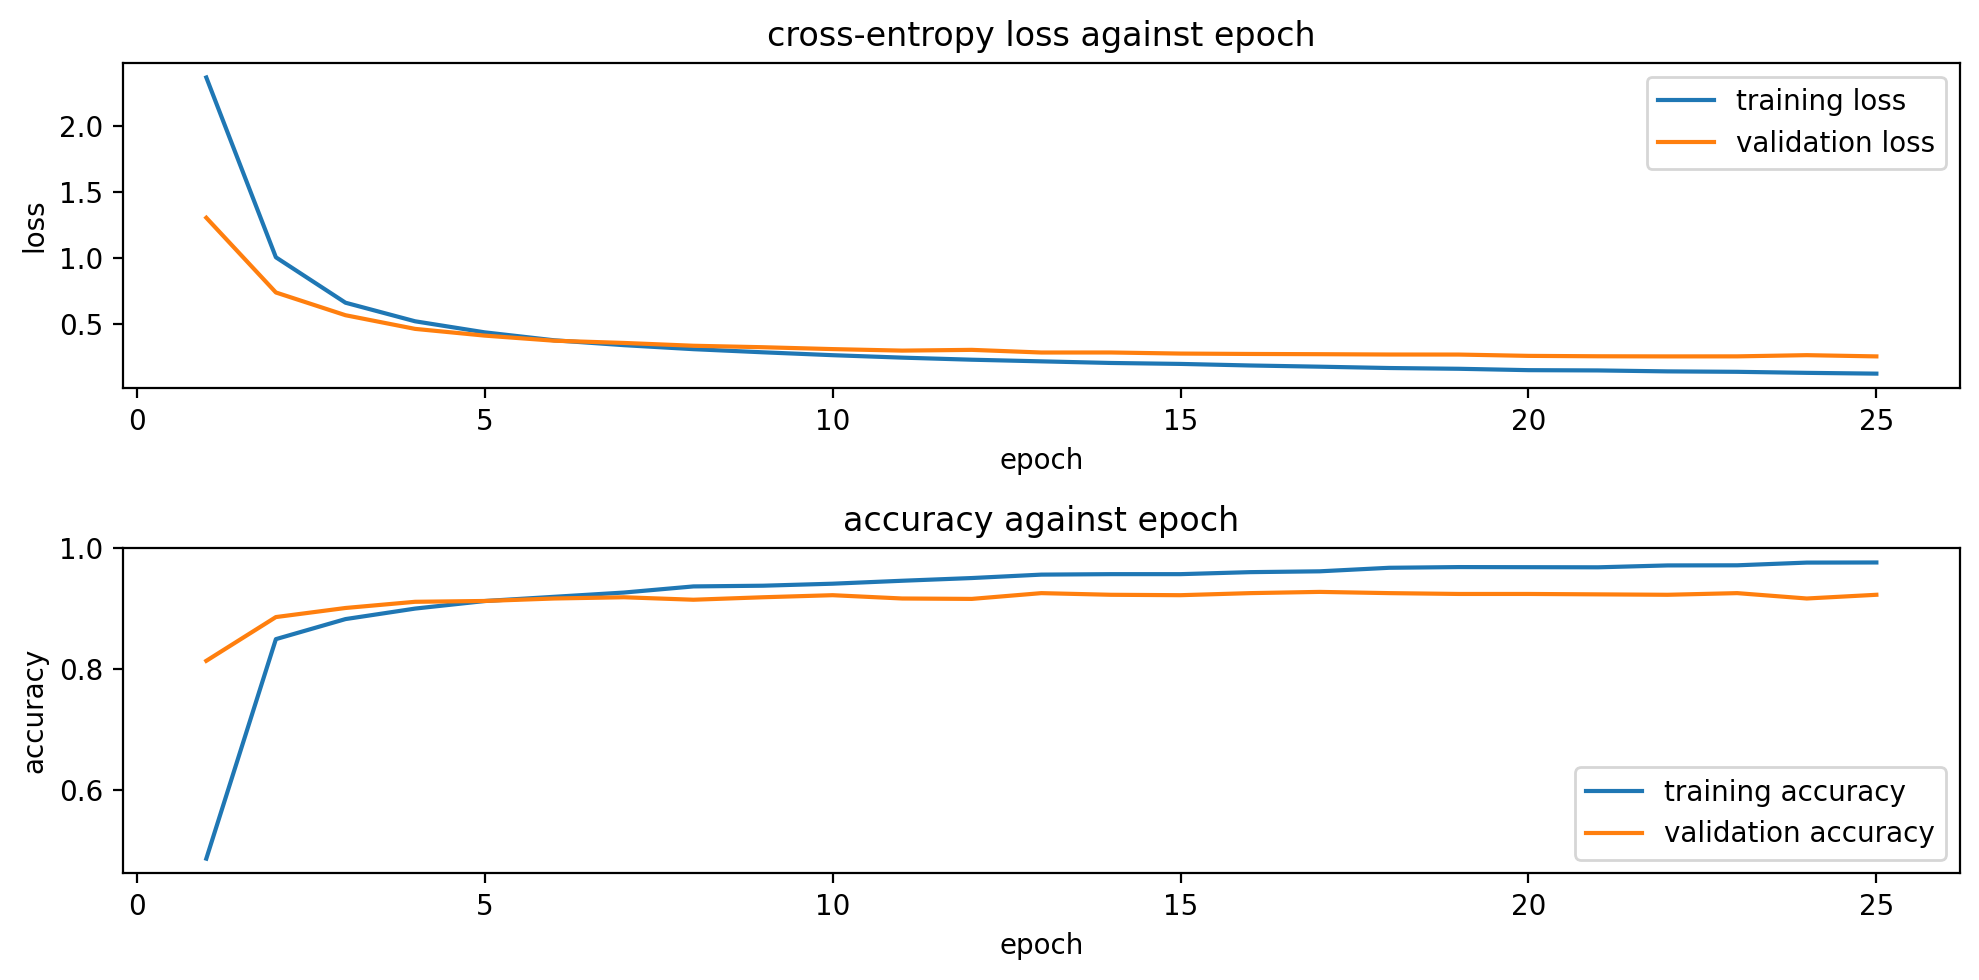

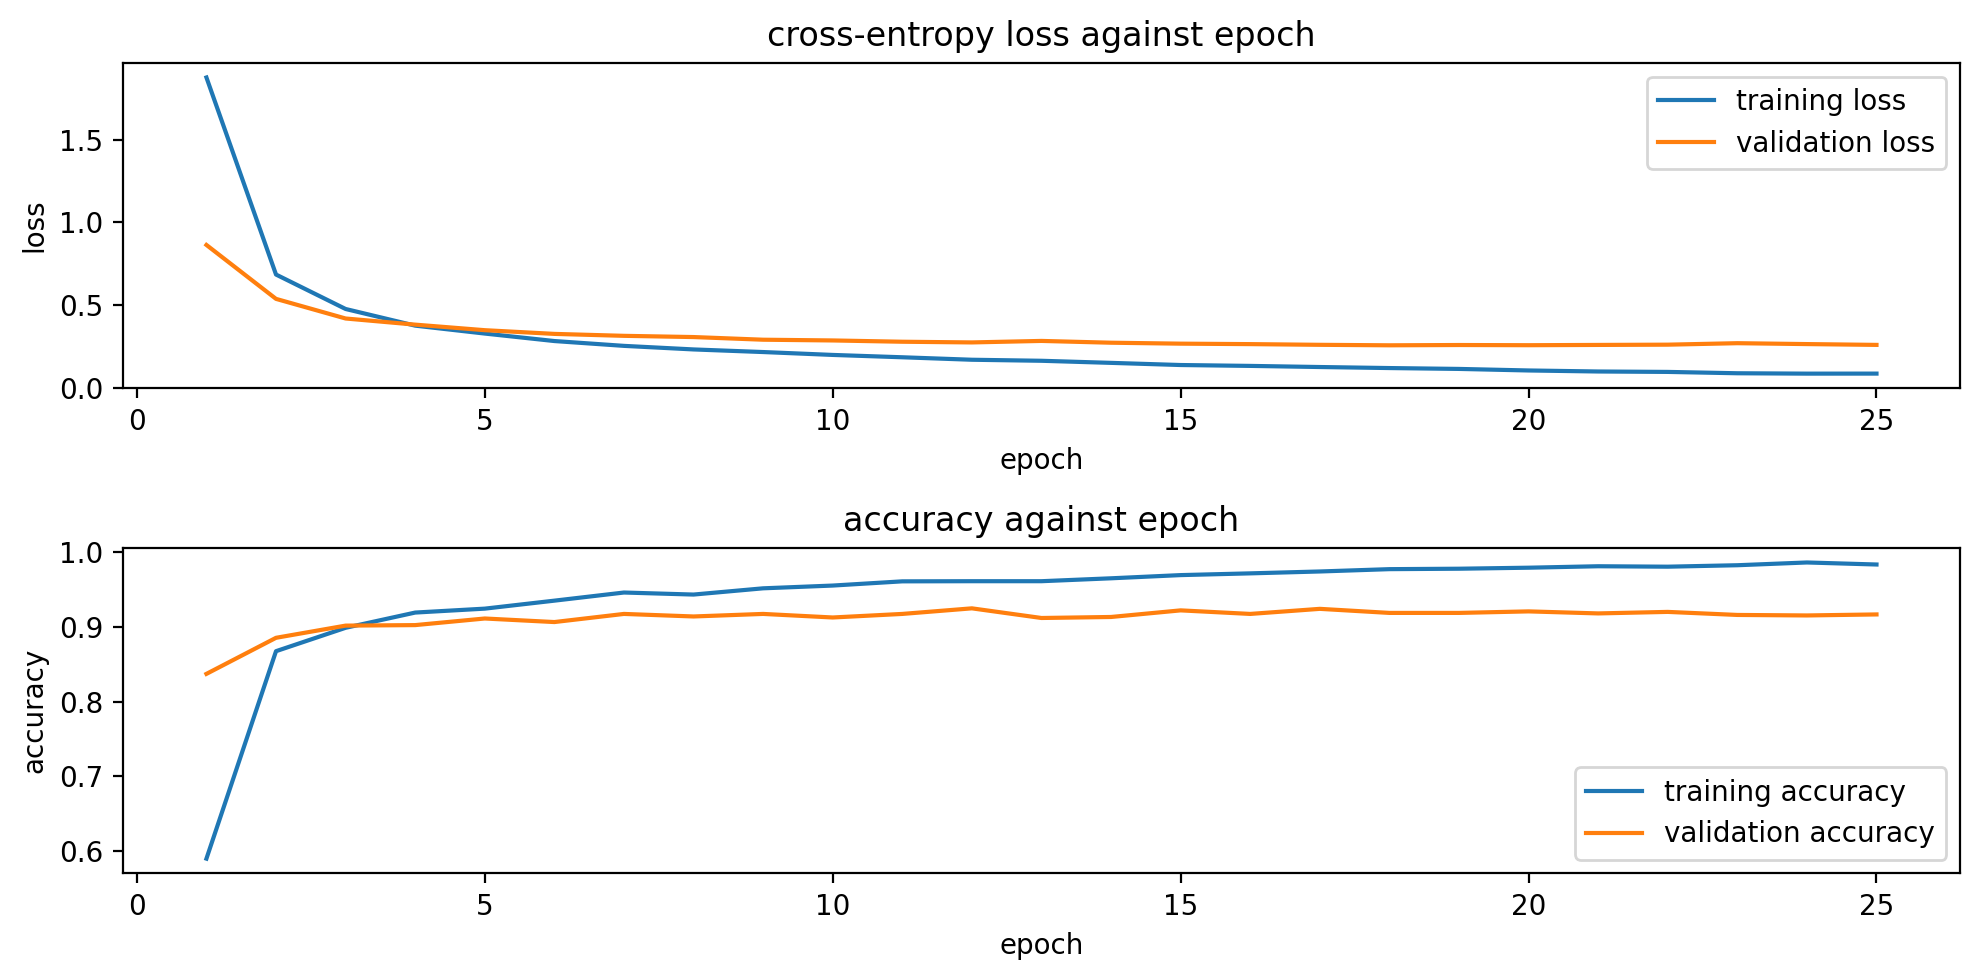

In [ ]:
#check if gpu avail
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
#send model to device
weights = models.ResNet18_Weights.DEFAULT


lr_vals = np.logspace(-5,-3, num = 10)
feature_extraction = True
results = []

for lr in lr_vals:

    model = models.resnet18(weights)
    model = model.to(device)
    loss = nn.CrossEntropyLoss()

    set_parameter_requires_grad(model, feature_extraction)

    num_classes = 37
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model = model.to(device)
    optimizer = optim.Adam(get_params_learn(model), lr = lr)
    print(f'Training with learning rate of {lr}')
    model_base, hist_base = train_model(model, {'train':train_data_loader, 'validation':valid_data_loader}, loss, optimizer, 25)

    torch.save(model_base.state_dict(), f'/content/gdrive/My Drive/DD2424/breeds_lr{lr}.pt')
    hist_base.to_csv(f'/content/gdrive/My Drive/DD2424/breeds_lr{lr}_hist.csv')


    results.append(test_model(model_base, test_data_loader))

    plt.rcParams['figure.figsize'] = [10, 5]
    plt.rcParams['figure.dpi'] = 200
    fig, axs = plt.subplots(2)
    axs[0].plot(hist_base['train loss'], label = 'training loss')
    axs[0].plot(hist_base['valid loss'], label = 'validation loss')
    axs[0].set_xlabel('epoch')
    axs[0].set_ylabel('loss')
    axs[0].legend()
    axs[0].set_title(f'cross-entropy loss against epoch')
    axs[1].plot(hist_base['train acc'], label = 'training accuracy')
    axs[1].plot(hist_base['valid acc'], label = 'validation accuracy')
    axs[1].set_xlabel('epoch')
    axs[1].set_ylabel('accuracy')
    axs[1].legend()
    axs[1].set_title(f'accuracy against epoch')
    fig.tight_layout()
    fig.savefig(f'/content/gdrive/My Drive/DD2424/breeds_lr{lr}_graph.png')



In [ ]:
for i in range(len(results)):
  print(f'Model with learning rate of {lr_vals[i]} achieved test accuracy of {results[i]}')

NameError: ignored

# Data augmentation

In [ ]:
train_new_transform=transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ScaleJitter(target_size=[224,224]),
        transforms.ColorJitter(brightness=0.1,contrast=0.05),
        transforms.Resize(256),
        transforms.RandomCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])
valid_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [ ]:
#load images
train_aug_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], train_new_transform)
valid_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)
test_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)

In [ ]:
#imgplot = plt.imshow(train_aug_set.__getitem__(20)[0].transpose(0,2).transpose(0,1))

In [ ]:
#train-test split of indices
indices = np.array(range(len(image_labels.index)))

test_ratio = 0.1
valid_ratio = 0.2

non_test_idx, test_idx = train_test_split(indices, test_size = test_ratio, random_state = 1)
train_idx, valid_idx = train_test_split(non_test_idx, test_size = valid_ratio/(1-test_ratio), random_state = 1)

train_aug_set = torch.utils.data.Subset(train_aug_set, train_idx)
valid_set = torch.utils.data.Subset(valid_set, valid_idx)
test_set = torch.utils.data.Subset(test_set, test_idx)

print(f'train set has size of {len(train_aug_set)}')
print(f'valid set has size of {len(valid_set)}')
print(f'test set has size of {len(test_set)}')

train set has size of 5144
valid set has size of 1470
test set has size of 735


In [ ]:
train_aug_data_loader = torch.utils.data.DataLoader(train_aug_set, batch_size = 64, shuffle=True, num_workers = 4)
valid_data_loader = torch.utils.data.DataLoader(valid_set, batch_size = 64, shuffle=True, num_workers = 4)
test_data_loader = torch.utils.data.DataLoader(test_set, batch_size = 64, shuffle=True, num_workers = 4)
train_valid_sizes = {'train':len(train_aug_set), 'validation':len(valid_set)}

In [ ]:
#check if gpu avail
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
#send model to device
weights = models.ResNet18_Weights.DEFAULT
model_new = models.resnet18(weights)
model_new = model_new.to(device)
#define loss fn
loss = nn.CrossEntropyLoss()
#feature extracting or finetuning
feature_extraction = True



cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [ ]:
#we want all to requires_grad if fine tuning, but only new top layer to requires_grad if feature extracting
set_parameter_requires_grad(model_new, feature_extraction)

In [ ]:
#replace final layer
num_classes = 37
model_new.fc = nn.Linear(model_new.fc.in_features,num_classes)
model_new = model_new.to(device)

In [ ]:
params_to_update = model_new.parameters()
optimizer_new = optim.Adam(get_params_learn(model_new), lr = 0.003)

	 fc.weight
	 fc.bias


In [ ]:
model_new, hist_new = train_model(model_new, {'train':train_aug_data_loader, 'validation':valid_data_loader}, loss, optimizer_new, 50)

_______________
Epoch 1 of 50
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 1.624601043679666 
Accuracy: 0.5863141524105754


For validation set:  
Loss: 0.5271565440560685 
Accuracy: 0.8428571428571427


_______________
Epoch 2 of 50
_______________
For train set:  
Loss: 0.8212550066492605 
Accuracy: 0.7669129082426127


For validation set:  
Loss: 0.4159551773752485 
Accuracy: 0.873469387755102


_______________
Epoch 3 of 50
_______________
For train set:  
Loss: 0.6988942499850438 
Accuracy: 0.797045101088647


For validation set:  
Loss: 0.40555670423572565 
Accuracy: 0.8802721088435373


_______________
Epoch 4 of 50
_______________
For train set:  
Loss: 0.6545268993355438 
Accuracy: 0.8069595645412131


For validation set:  
Loss: 0.3492432334796101 
Accuracy: 0.8959183673469387


_______________
Epoch 5 of 50
_______________
For train set:  
Loss: 0.6110371142672157 
Accuracy: 0.8133748055987559


For validation set:  
Loss: 0.3595712927328486 
Accuracy: 0.8802721088435373


_______________
Epoch 6 of 50
_______________
For tra

In [ ]:
#test_model(model_curr, test_data_loader)
test_model(model_new, test_data_loader)

Model achieves accuracy of 0.8843537414965986 on test set


tensor(0.8844, device='cuda:0', dtype=torch.float64)

In [ ]:
torch.save(model_new.state_dict(), '/content/gdrive/My Drive/DD2424/breeds_aug_50_epochs.pt')
hist_new.to_csv('/content/gdrive/My Drive/DD2424/breeds_aug_50epochs_hist.csv')

In [ ]:
hist_base = pd.read_csv('/content/gdrive/My Drive/DD2424/breeds_50epochs_hist.csv')
hist_new = pd.read_csv('/content/gdrive/My Drive/DD2424/breeds_aug_50epochs_hist.csv')

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200
fig, axs = plt.subplots(2)
axs[0].plot(hist_base['valid loss'], label = 'validation loss')
axs[0].plot(hist_new['valid loss'], label = 'validation loss with new aug')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].legend()
axs[0].set_title(f'cross-entropy loss against epoch')
axs[1].plot(hist_base['valid acc'], label = 'validation accuracy')
axs[1].plot(hist_new['valid acc'], label = 'validation accuracy with new aug')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].legend()
axs[1].set_title(f'accuracy against epoch')
fig.tight_layout()

# Unfreezing more layers (with diff learning rates for layers)

In [ ]:
train_new_transform=transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ScaleJitter(target_size=[224,224]),
        transforms.ColorJitter(brightness=0.1,contrast=0.05),
        transforms.Resize(256),
        transforms.RandomCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])
valid_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [ ]:
#load images
train_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], train_new_transform)
valid_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)
test_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)

In [ ]:
#train-test split of indices
indices = np.array(range(len(image_labels.index)))

test_ratio = 0.1
valid_ratio = 0.2

non_test_idx, test_idx = train_test_split(indices, test_size = test_ratio, random_state = 1)
train_idx, valid_idx = train_test_split(non_test_idx, test_size = valid_ratio/(1-test_ratio), random_state = 1)

train_set = torch.utils.data.Subset(train_set, train_idx)
valid_set = torch.utils.data.Subset(valid_set, valid_idx)
test_set = torch.utils.data.Subset(test_set, test_idx)

print(f'train set has size of {len(train_set)}')
print(f'valid set has size of {len(valid_set)}')
print(f'test set has size of {len(test_set)}')

train set has size of 5144
valid set has size of 1470
test set has size of 735


In [ ]:
train_data_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle=True, num_workers = 4)
valid_data_loader = torch.utils.data.DataLoader(valid_set, batch_size = 64, shuffle=True, num_workers = 4)
test_data_loader = torch.utils.data.DataLoader(test_set, batch_size = 64, shuffle=True, num_workers = 4)
train_valid_loaders = {'train':train_data_loader, 'validation':valid_data_loader}
train_valid_sizes = {'train':len(train_set), 'validation':len(valid_set)}

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
for i in range(6,9):
    print(f'freezing with i = {i}')
    #check if gpu avail
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print(device)
    #send model to device
    weights = models.ResNet18_Weights.DEFAULT
    model = models.resnet18(weights)
    model = model.to(device)
    #define loss fn
    loss = nn.CrossEntropyLoss()
    #feature extracting or finetuning
    feature_extraction = True
    ct = 0
    for child in model.children():
        #print(child)
        ct += 1
        if ct < i:
            for param in child.parameters():
                #print(param)
                param.requires_grad = False

    #replace final layer
    num_classes = 37
    model.fc = nn.Linear(model.fc.in_features,num_classes)
    model = model.to(device)

    optimizer = optim.Adam(get_params_learn(model), lr = 0.003)

    model_unfreeze_i, hist_unfreeze_i = train_model(model, {'train':train_data_loader, 'validation':valid_data_loader}, loss, optimizer, 50)

    test_model(model_unfreeze_i, test_data_loader)

freezing with i = 6
cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 205MB/s]


	 layer2.0.conv1.weight
	 layer2.0.bn1.weight
	 layer2.0.bn1.bias
	 layer2.0.conv2.weight
	 layer2.0.bn2.weight
	 layer2.0.bn2.bias
	 layer2.0.downsample.0.weight
	 layer2.0.downsample.1.weight
	 layer2.0.downsample.1.bias
	 layer2.1.conv1.weight
	 layer2.1.bn1.weight
	 layer2.1.bn1.bias
	 layer2.1.conv2.weight
	 layer2.1.bn2.weight
	 layer2.1.bn2.bias
	 layer3.0.conv1.weight
	 layer3.0.bn1.weight
	 layer3.0.bn1.bias
	 layer3.0.conv2.weight
	 layer3.0.bn2.weight
	 layer3.0.bn2.bias
	 layer3.0.downsample.0.weight
	 layer3.0.downsample.1.weight
	 layer3.0.downsample.1.bias
	 layer3.1.conv1.weight
	 layer3.1.bn1.weight
	 layer3.1.bn1.bias
	 layer3.1.conv2.weight
	 layer3.1.bn2.weight
	 layer3.1.bn2.bias
	 layer4.0.conv1.weight
	 layer4.0.bn1.weight
	 layer4.0.bn1.bias
	 layer4.0.conv2.weight
	 layer4.0.bn2.weight
	 layer4.0.bn2.bias
	 layer4.0.downsample.0.weight
	 layer4.0.downsample.1.weight
	 layer4.0.downsample.1.bias
	 layer4.1.conv1.weight
	 layer4.1.bn1.weight
	 layer4.1.bn1.bias
	

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 2.5050880200755357 
Accuracy: 0.30657076205287714


For validation set:  
Loss: 3.758719812445089 
Accuracy: 0.19931972789115646


_______________
Epoch 2 of 50
_______________
For train set:  
Loss: 1.6999635258877814 
Accuracy: 0.4784214618973561


For validation set:  
Loss: 1.8064158183376806 
Accuracy: 0.46462585034013604


_______________
Epoch 3 of 50
_______________
For train set:  
Loss: 1.3966699236103017 
Accuracy: 0.5746500777604977


For validation set:  
Loss: 1.2173678557078043 
Accuracy: 0.6122448979591836


_______________
Epoch 4 of 50
_______________
For train set:  
Loss: 1.2375084732776482 
Accuracy: 0.6248055987558321


For validation set:  
Loss: 1.1854060246019946 
Accuracy: 0.6326530612244897


_______________
Epoch 5 of 50
_______________
For train set:  
Loss: 1.1784349655845487 
Accuracy: 0.6384136858475894


For validation set:  
Loss: 1.329559168037103 
Accuracy: 0.6122448979591836


_______________
Epoch 6 of 50
_______________
For 

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


	 layer3.0.conv1.weight
	 layer3.0.bn1.weight
	 layer3.0.bn1.bias
	 layer3.0.conv2.weight
	 layer3.0.bn2.weight
	 layer3.0.bn2.bias
	 layer3.0.downsample.0.weight
	 layer3.0.downsample.1.weight
	 layer3.0.downsample.1.bias
	 layer3.1.conv1.weight
	 layer3.1.bn1.weight
	 layer3.1.bn1.bias
	 layer3.1.conv2.weight
	 layer3.1.bn2.weight
	 layer3.1.bn2.bias
	 layer4.0.conv1.weight
	 layer4.0.bn1.weight
	 layer4.0.bn1.bias
	 layer4.0.conv2.weight
	 layer4.0.bn2.weight
	 layer4.0.bn2.bias
	 layer4.0.downsample.0.weight
	 layer4.0.downsample.1.weight
	 layer4.0.downsample.1.bias
	 layer4.1.conv1.weight
	 layer4.1.bn1.weight
	 layer4.1.bn1.bias
	 layer4.1.conv2.weight
	 layer4.1.bn2.weight
	 layer4.1.bn2.bias
	 fc.weight
	 fc.bias
_______________
Epoch 1 of 50
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 2.056639954795363 
Accuracy: 0.41018662519440124


For validation set:  
Loss: 1.6452436758547413 
Accuracy: 0.5095238095238095


_______________
Epoch 2 of 50
_______________
For train set:  
Loss: 1.3862818410014661 
Accuracy: 0.5738724727838258


For validation set:  
Loss: 1.3419709009378136 
Accuracy: 0.5938775510204081


_______________
Epoch 3 of 50
_______________
For train set:  
Loss: 1.0873138285350652 
Accuracy: 0.6648522550544324


For validation set:  
Loss: 1.5224870916937485 
Accuracy: 0.591156462585034


_______________
Epoch 4 of 50
_______________
For train set:  
Loss: 1.0045033430052026 
Accuracy: 0.6827371695178849


For validation set:  
Loss: 1.2447756970009836 
Accuracy: 0.6476190476190475


_______________
Epoch 5 of 50
_______________
For train set:  
Loss: 0.901947021484375 
Accuracy: 0.7208398133748056


For validation set:  
Loss: 0.8465090453219252 
Accuracy: 0.7346938775510203


_______________
Epoch 6 of 50
_______________
For tra

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


	 layer4.0.conv1.weight
	 layer4.0.bn1.weight
	 layer4.0.bn1.bias
	 layer4.0.conv2.weight
	 layer4.0.bn2.weight
	 layer4.0.bn2.bias
	 layer4.0.downsample.0.weight
	 layer4.0.downsample.1.weight
	 layer4.0.downsample.1.bias
	 layer4.1.conv1.weight
	 layer4.1.bn1.weight
	 layer4.1.bn1.bias
	 layer4.1.conv2.weight
	 layer4.1.bn2.weight
	 layer4.1.bn2.bias
	 fc.weight
	 fc.bias
_______________
Epoch 1 of 50
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 1.5320088729888062 
Accuracy: 0.5602643856920684


For validation set:  
Loss: 0.8769361562469379 
Accuracy: 0.7224489795918367


_______________
Epoch 2 of 50
_______________
For train set:  
Loss: 0.9640019003006385 
Accuracy: 0.7000388802488335


For validation set:  
Loss: 0.730846821369768 
Accuracy: 0.7727891156462584


_______________
Epoch 3 of 50
_______________
For train set:  
Loss: 0.7893077492899324 
Accuracy: 0.7560264385692068


For validation set:  
Loss: 0.4949578056530077 
Accuracy: 0.8476190476190476


_______________
Epoch 4 of 50
_______________
For train set:  
Loss: 0.6981835483948513 
Accuracy: 0.7871306376360808


For validation set:  
Loss: 0.4927840873497684 
Accuracy: 0.8476190476190476


_______________
Epoch 5 of 50
_______________
For train set:  
Loss: 0.6608869966415002 
Accuracy: 0.8063763608087092


For validation set:  
Loss: 0.5157390947650079 
Accuracy: 0.8408163265306122


_______________
Epoch 6 of 50
_______________
For tr

# Varying learning rates

In [ ]:
### Testing different learning rates with ct < 9 and epoch = 30
# lr = 0.00005 --> test accuracy 0.8503401360544217
# lr = 0.0001 --> test accuracy 0.9061224489795918
# lr = 0.0005 --> test accuracy 0.8829931972789115
# lr = 0.001 --> test accuracy  0.8884353741496598
# lr = 0.005 --> test accuracy  0.8721088435374149
# lr = 0.01 --> test accuracy
# lr = 0.05 --> test accuracy   0.8653061224489795
# lr = 0.1 --> test accuracy    0.8571428571428571

print(f'freezing with i = {9}')
#check if gpu avail
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
#send model to device
weights = models.ResNet18_Weights.DEFAULT
model = models.resnet18(weights)
model = model.to(device)
#define loss fn
loss = nn.CrossEntropyLoss()
#feature extracting or finetuning
feature_extraction = True
ct = 0
for child in model.children():
    #print(child)
    ct += 1
    if ct < 9:
        for param in child.parameters():
            #print(param)
            param.requires_grad = False

#replace final layer
num_classes = 37
model.fc = nn.Linear(model.fc.in_features,num_classes)
model = model.to(device)

optimizer = optim.Adam(get_params_learn(model), lr = 0.05)

model_unfreeze_i, hist_unfreeze_i = train_model(model, {'train':train_data_loader, 'validation':valid_data_loader}, loss, optimizer, 30)

test_model(model_unfreeze_i, test_data_loader)

freezing with i = 9
cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


	 fc.weight
	 fc.bias
_______________
Epoch 1 of 30
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 9.730964244246298 
Accuracy: 0.4931959564541213


For validation set:  
Loss: 1.5199283405226105 
Accuracy: 0.8047619047619047


_______________
Epoch 2 of 30
_______________
For train set:  
Loss: 2.322088090294442 
Accuracy: 0.7060653188180405


For validation set:  
Loss: 2.544244441531953 
Accuracy: 0.7537414965986394


_______________
Epoch 3 of 30
_______________
For train set:  
Loss: 2.634590474851024 
Accuracy: 0.7194790046656299


For validation set:  
Loss: 2.077447237206154 
Accuracy: 0.7972789115646258


_______________
Epoch 4 of 30
_______________
For train set:  
Loss: 2.421836408448998 
Accuracy: 0.7365863141524106


For validation set:  
Loss: 1.64520717753845 
Accuracy: 0.8326530612244898


_______________
Epoch 5 of 30
_______________
For train set:  
Loss: 2.3017693003451285 
Accuracy: 0.7571928460342147


For validation set:  
Loss: 1.8550958372297741 
Accuracy: 0.8197278911564625


_______________
Epoch 6 of 30
_______________
For train set

tensor(0.8653, device='cuda:0', dtype=torch.float64)

# Layer-specific learning rate

In [ ]:
### Block Specific learning rates
### Testing different learning rates with ct < 9 and epoch = 30
# lr = 0.00005 --> test accuracy 0.8503401360544217
# lr = 0.0001 --> test accuracy 0.9061224489795918 Used for testing block specific lr --> test accuracy 0.874829931972789
# lr = 0.0005 --> test accuracy 0.8829931972789115
# lr = 0.001 --> test accuracy  0.8884353741496598
# lr = 0.005 --> test accuracy  0.8721088435374149
# lr = 0.01 --> test accuracy
# lr = 0.05 --> test accuracy   0.8653061224489795
# lr = 0.1 --> test accuracy    0.8571428571428571

print(f'freezing with i = {9}')
#check if gpu avail
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
#send model to device
weights = models.ResNet18_Weights.DEFAULT
model = models.resnet18(weights)
model = model.to(device)
#define loss fn
loss = nn.CrossEntropyLoss()
#feature extracting or finetuning
feature_extraction = True
ct = 0
for child in model.children():
    #print(child)
    ct += 1
    if ct < 9:
        for param in child.parameters():
            #print(param)
            param.requires_grad = False

#replace final layer
num_classes = 37
model.fc = nn.Linear(model.fc.in_features,num_classes)
model = model.to(device)

#### Block Specific learning rates (decrease the deeper we go)
params_to_update = []
for idx, (name, param) in enumerate(model.named_parameters()):
    if param.requires_grad:
        params_to_update.append(name)
        print(f'{idx}: {name}')
params_to_update.reverse()
prev_layer = params_to_update[0].split('.')[0]
lr = 0.0001
lr_factor = 0.2
params = []
#learning rate decreases the deeper we go
for idx, name in enumerate(params_to_update):

    curr_layer = name.split('.')[0]

    if curr_layer != prev_layer:
        lr *= lr_factor
    prev_layer = curr_layer
    params += [{'params': [p for n, p in model.named_parameters() if n == name],
                    'lr':     lr}]
optimizer = optim.Adam(params, lr = 0.0001)

model_unfreeze_i, hist_unfreeze_i = train_model(model, {'train':train_data_loader, 'validation':valid_data_loader}, loss, optimizer, 30)

test_model(model_unfreeze_i, test_data_loader)

freezing with i = 9
cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


60: fc.weight
61: fc.bias
_______________
Epoch 1 of 30
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 3.474177636773924 
Accuracy: 0.08650855365474339


For validation set:  
Loss: 3.122854062164722 
Accuracy: 0.23605442176870747


_______________
Epoch 2 of 30
_______________
For train set:  
Loss: 3.0302572083510286 
Accuracy: 0.28888024883359253


For validation set:  
Loss: 2.632732323237828 
Accuracy: 0.4748299319727891


_______________
Epoch 3 of 30
_______________
For train set:  
Loss: 2.66572531163229 
Accuracy: 0.4525660964230171


For validation set:  
Loss: 2.239801014037359 
Accuracy: 0.6020408163265306


_______________
Epoch 4 of 30
_______________
For train set:  
Loss: 2.3550856895802736 
Accuracy: 0.5643468118195957


For validation set:  
Loss: 1.9168382617081103 
Accuracy: 0.6857142857142857


_______________
Epoch 5 of 30
_______________
For train set:  
Loss: 2.114857347348986 
Accuracy: 0.6234447900466563


For validation set:  
Loss: 1.6588743994836093 
Accuracy: 0.7523809523809524


_______________
Epoch 6 of 30
_______________
For train

tensor(0.8748, device='cuda:0', dtype=torch.float64)

# Unfreeze BN params with best resultts from layer-specific learning rate and decreasing learning rate

In [ ]:
### Unfreezing BN params
### Block Specific learning rates
### Testing different learning rates with ct < 9 and epoch = 30
# lr = 0.00005 --> test accuracy 0.8503401360544217
# lr = 0.0001 --> test accuracy 0.9061224489795918 Used for testing block specific lr --> test accuracy 0.874829931972789
# lr = 0.0005 --> test accuracy 0.8829931972789115
# lr = 0.001 --> test accuracy  0.8884353741496598
# lr = 0.005 --> test accuracy  0.8721088435374149
# lr = 0.01 --> test accuracy
# lr = 0.05 --> test accuracy   0.8653061224489795
# lr = 0.1 --> test accuracy    0.8571428571428571

# Unfreezing BN params --> test accuracy 0.8897959183673468

print(f'freezing with i = {9}')
#check if gpu avail
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
#send model to device
weights = models.ResNet18_Weights.DEFAULT
model = models.resnet18(weights)
model = model.to(device)
#define loss fn
loss = nn.CrossEntropyLoss()
#feature extracting or finetuning
feature_extraction = True
ct = 0
for child in model.children():
    #print(child)
    ct += 1
    if ct < 9:
        for param in child.parameters():
            #print(param)
            param.requires_grad = False

## UNFREEZE BN PARAMS
for name, param in model.named_parameters():
    if 'bn' in name:
        param.requires_grad = True

#replace final layer
num_classes = 37
model.fc = nn.Linear(model.fc.in_features,num_classes)
model = model.to(device)

#### Block Specific learning rates (decrease the deeper we go)
params_to_update = []
for idx, (name, param) in enumerate(model.named_parameters()):
    if param.requires_grad:
        params_to_update.append(name)
        print(f'{idx}: {name}')
params_to_update.reverse()
prev_layer = params_to_update[0].split('.')[0]
lr = 0.0001
lr_factor = 0.2
params = []
#learning rate decreases the deeper we go
for idx, name in enumerate(params_to_update):

    curr_layer = name.split('.')[0]

    if curr_layer != prev_layer:
        lr *= lr_factor
    prev_layer = curr_layer
    params += [{'params': [p for n, p in model.named_parameters() if n == name],
                    'lr':     lr}]
optimizer = optim.Adam(params, lr = 0.0001)

model_unfreeze_i, hist_unfreeze_i = train_model(model, {'train':train_data_loader, 'validation':valid_data_loader}, loss, optimizer, 30)

test_model(model_unfreeze_i, test_data_loader)

freezing with i = 9
cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


1: bn1.weight
2: bn1.bias
4: layer1.0.bn1.weight
5: layer1.0.bn1.bias
7: layer1.0.bn2.weight
8: layer1.0.bn2.bias
10: layer1.1.bn1.weight
11: layer1.1.bn1.bias
13: layer1.1.bn2.weight
14: layer1.1.bn2.bias
16: layer2.0.bn1.weight
17: layer2.0.bn1.bias
19: layer2.0.bn2.weight
20: layer2.0.bn2.bias
25: layer2.1.bn1.weight
26: layer2.1.bn1.bias
28: layer2.1.bn2.weight
29: layer2.1.bn2.bias
31: layer3.0.bn1.weight
32: layer3.0.bn1.bias
34: layer3.0.bn2.weight
35: layer3.0.bn2.bias
40: layer3.1.bn1.weight
41: layer3.1.bn1.bias
43: layer3.1.bn2.weight
44: layer3.1.bn2.bias
46: layer4.0.bn1.weight
47: layer4.0.bn1.bias
49: layer4.0.bn2.weight
50: layer4.0.bn2.bias
55: layer4.1.bn1.weight
56: layer4.1.bn1.bias
58: layer4.1.bn2.weight
59: layer4.1.bn2.bias
60: fc.weight
61: fc.bias
_______________
Epoch 1 of 30
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 3.524227291762736 
Accuracy: 0.06765163297045101


For validation set:  
Loss: 3.1712864204328888 
Accuracy: 0.1768707482993197


_______________
Epoch 2 of 30
_______________
For train set:  
Loss: 3.044836671319015 
Accuracy: 0.25874805598755835


For validation set:  
Loss: 2.660515342439924 
Accuracy: 0.427891156462585


_______________
Epoch 3 of 30
_______________
For train set:  
Loss: 2.6717684836261566 
Accuracy: 0.4331259720062208


For validation set:  
Loss: 2.241270184030338 
Accuracy: 0.5945578231292517


_______________
Epoch 4 of 30
_______________
For train set:  
Loss: 2.3448330673793243 
Accuracy: 0.5493779160186625


For validation set:  
Loss: 1.8873741305604272 
Accuracy: 0.7095238095238094


_______________
Epoch 5 of 30
_______________
For train set:  
Loss: 2.062460672985154 
Accuracy: 0.6345256609642301


For validation set:  
Loss: 1.6096341718621805 
Accuracy: 0.7632653061224489


_______________
Epoch 6 of 30
_______________
For train

tensor(0.8898, device='cuda:0', dtype=torch.float64)

# Final model

In [ ]:
train_new_transform=transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ScaleJitter(target_size=[224,224]),
        transforms.ColorJitter(brightness=0.1,contrast=0.05),
        transforms.Resize(256),
        transforms.RandomCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])
valid_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [ ]:
#load images
train_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], train_new_transform)
valid_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)
test_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)

In [ ]:
#train-test split of indices
indices = np.array(range(len(image_labels.index)))

test_ratio = 0.1
valid_ratio = 0.2

non_test_idx, test_idx = train_test_split(indices, test_size = test_ratio, random_state = 1)
train_idx, valid_idx = train_test_split(non_test_idx, test_size = valid_ratio/(1-test_ratio), random_state = 1)

train_set = torch.utils.data.Subset(train_set, train_idx)
valid_set = torch.utils.data.Subset(valid_set, valid_idx)
test_set = torch.utils.data.Subset(test_set, test_idx)

print(f'train set has size of {len(train_set)}')
print(f'valid set has size of {len(valid_set)}')
print(f'test set has size of {len(test_set)}')

train set has size of 5144
valid set has size of 1470
test set has size of 735


In [ ]:
train_data_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle=True, num_workers = 4)
valid_data_loader = torch.utils.data.DataLoader(valid_set, batch_size = 64, shuffle=True, num_workers = 4)
test_data_loader = torch.utils.data.DataLoader(test_set, batch_size = 64, shuffle=True, num_workers = 4)
train_valid_loaders = {'train':train_data_loader, 'validation':valid_data_loader}
train_valid_sizes = {'train':len(train_set), 'validation':len(valid_set)}

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
print(f'freezing with i = {9}')
#check if gpu avail
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
#send model to device
weights = models.ResNet18_Weights.DEFAULT
model = models.resnet18(weights)
model = model.to(device)
#define loss fn
loss = nn.CrossEntropyLoss()
#feature extracting or finetuning
feature_extraction = True
ct = 0
for child in model.children():
    #print(child)
    ct += 1
    if ct < 9:
        for param in child.parameters():
            #print(param)
            param.requires_grad = False

#replace final layer
num_classes = 37
model.fc = nn.Linear(model.fc.in_features,num_classes)
model = model.to(device)

optimizer = optim.Adam(get_params_learn(model), lr = 0.0001)

model_unfreeze_i, hist_unfreeze_i = train_model(model, {'train':train_data_loader, 'validation':valid_data_loader}, loss, optimizer, 60)

test_model(model_unfreeze_i, test_data_loader)

freezing with i = 9
cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


	 fc.weight
	 fc.bias
_______________
Epoch 1 of 60
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 3.535544188174638 
Accuracy: 0.08398133748055987


For validation set:  
Loss: 3.2000681598170275 
Accuracy: 0.19047619047619047


_______________
Epoch 2 of 60
_______________
For train set:  
Loss: 3.0853852261651546 
Accuracy: 0.23561430793157076


For validation set:  
Loss: 2.7005363451380306 
Accuracy: 0.419047619047619


_______________
Epoch 3 of 60
_______________
For train set:  
Loss: 2.7020417535286483 
Accuracy: 0.4307931570762053


For validation set:  
Loss: 2.298641306364617 
Accuracy: 0.5979591836734693


_______________
Epoch 4 of 60
_______________
For train set:  
Loss: 2.4021301503129546 
Accuracy: 0.541796267496112


For validation set:  
Loss: 1.9628969033559163 
Accuracy: 0.6931972789115646


_______________
Epoch 5 of 60
_______________
For train set:  
Loss: 2.1545829294628898 
Accuracy: 0.6115863141524106


For validation set:  
Loss: 1.7072144595944152 
Accuracy: 0.7625850340136053


_______________
Epoch 6 of 60
_______________
For tr

tensor(0.8816, device='cuda:0', dtype=torch.float64)

In [ ]:
params_to_update = []
for idx, (name, param) in enumerate(model.named_parameters()):
    if param.requires_grad:
        params_to_update.append(name)
        print(f'{idx}: {name}')
params_to_update.reverse()
prev_layer = params_to_update[0].split('.')[0]
lr = 0.001
lr_factor = 0.2
params = []
#learning rate decreases the deeper we go
for idx, name in enumerate(params_to_update):

    curr_layer = name.split('.')[0]

    if curr_layer != prev_layer:
        lr *= lr_factor
    prev_layer = curr_layer
    params += [{'params': [p for n, p in model.named_parameters() if n == name],
                    'lr':     lr}]
optimizer = optim.Adam(params, lr = 0.001)

45: layer4.0.conv1.weight
46: layer4.0.bn1.weight
47: layer4.0.bn1.bias
48: layer4.0.conv2.weight
49: layer4.0.bn2.weight
50: layer4.0.bn2.bias
51: layer4.0.downsample.0.weight
52: layer4.0.downsample.1.weight
53: layer4.0.downsample.1.bias
54: layer4.1.conv1.weight
55: layer4.1.bn1.weight
56: layer4.1.bn1.bias
57: layer4.1.conv2.weight
58: layer4.1.bn2.weight
59: layer4.1.bn2.bias
60: fc.weight
61: fc.bias


In [ ]:
model_unfreeze_4, hist_unfreeze_4 = train_model(model, {'train':train_data_loader, 'validation':valid_data_loader}, loss, optimizer, 50)


_______________
Epoch 1 of 50
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 0.4844423594129957 
Accuracy: 0.8528382581648523


For validation set:  
Loss: 0.26395845486193287 
Accuracy: 0.91156462585034


_______________
Epoch 2 of 50
_______________
For train set:  
Loss: 0.38587717839384894 
Accuracy: 0.8837480559875583


For validation set:  
Loss: 0.3143735876699694 
Accuracy: 0.8945578231292516


_______________
Epoch 3 of 50
_______________
For train set:  
Loss: 0.35076824340442103 
Accuracy: 0.8924961119751167


For validation set:  
Loss: 0.29088898309234046 
Accuracy: 0.9074829931972789


_______________
Epoch 4 of 50
_______________
For train set:  
Loss: 0.3079491211318673 
Accuracy: 0.9082426127527217


For validation set:  
Loss: 0.2950921116029324 
Accuracy: 0.9136054421768707


_______________
Epoch 5 of 50
_______________
For train set:  
Loss: 0.27229620268333754 
Accuracy: 0.9175738724727838


For validation set:  
Loss: 0.2934476802949192 
Accuracy: 0.9136054421768707


_______________
Epoch 6 of 50
_______________
Fo

In [ ]:
#test_model(model_curr, test_data_loader)
test_model(model_unfreeze_4, test_data_loader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Model achieves accuracy of 0.8789115646258503 on test set


In [ ]:
torch.save(model_unfreeze_4.state_dict(), '/content/gdrive/My Drive/DD2424/breeds_aug_unfreeze_4_50_epochs.pt')
hist_unfreeze_4.to_csv('/content/gdrive/My Drive/DD2424/breeds_aug_unfreeze_4_50epochs_hist.csv')

In [ ]:
hist_unfreeze_4.head()

,train loss,train acc,valid loss,valid acc
1,0.484442,0.8528382581648523,0.263958,0.91156462585034
2,0.385877,0.8837480559875583,0.314374,0.8945578231292516
3,0.350768,0.8924961119751167,0.290889,0.9074829931972789
4,0.307949,0.9082426127527217,0.295092,0.9136054421768707
5,0.272296,0.9175738724727838,0.293448,0.9136054421768707


In [ ]:

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200
fig, axs = plt.subplots(2)
axs[0].plot(hist_new['valid loss'], label = 'validation loss with aug')
axs[0].plot(hist_unfreeze_4['valid loss'], label = 'validation loss with aug and unfreezing 4th block')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].legend()
axs[0].set_title(f'cross-entropy loss against epoch')
axs[1].plot(hist_new['valid acc'], label = 'validation accuracy with aug')
axs[1].plot(hist_unfreeze_4['valid acc'], label = 'validation accuracy with aug and unfreezing 4th block')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].legend()
axs[1].set_title(f'accuracy against epoch')
fig.tight_layout()

In [ ]:
#check if gpu avail
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
#send model to device
weights = models.ResNet18_Weights.DEFAULT
model = models.resnet18(weights)
model = model.to(device)
#define loss fn
loss = nn.CrossEntropyLoss()
#feature extracting or finetuning
feature_extraction = True



cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 191MB/s]


In [ ]:
#unfreeze blocks 3 and 4 as well
ct = 0
for child in model.children():
    print(child)
    #print(ct)
    ct += 1
    if ct < 7:
        for param in child.parameters():
            #print(param)
            param.requires_grad = False

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace=True)
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fal

In [ ]:
#replace final layer
num_classes = 37
model.fc = nn.Linear(model.fc.in_features,num_classes)
model = model.to(device)

In [ ]:
params_to_update = []
for idx, (name, param) in enumerate(model.named_parameters()):
    if param.requires_grad:
        params_to_update.append(name)
        print(f'{idx}: {name}')
params_to_update.reverse()
prev_layer = params_to_update[0].split('.')[0]
lr = 0.001
lr_factor = 0.2
params = []
#learning rate decreases the deeper we go
for idx, name in enumerate(params_to_update):

    curr_layer = name.split('.')[0]

    if curr_layer != prev_layer:
        lr *= lr_factor
    prev_layer = curr_layer
    params += [{'params': [p for n, p in model.named_parameters() if n == name],
                    'lr':     lr}]
optimizer = optim.Adam(params, lr = 0.001)

30: layer3.0.conv1.weight
31: layer3.0.bn1.weight
32: layer3.0.bn1.bias
33: layer3.0.conv2.weight
34: layer3.0.bn2.weight
35: layer3.0.bn2.bias
36: layer3.0.downsample.0.weight
37: layer3.0.downsample.1.weight
38: layer3.0.downsample.1.bias
39: layer3.1.conv1.weight
40: layer3.1.bn1.weight
41: layer3.1.bn1.bias
42: layer3.1.conv2.weight
43: layer3.1.bn2.weight
44: layer3.1.bn2.bias
45: layer4.0.conv1.weight
46: layer4.0.bn1.weight
47: layer4.0.bn1.bias
48: layer4.0.conv2.weight
49: layer4.0.bn2.weight
50: layer4.0.bn2.bias
51: layer4.0.downsample.0.weight
52: layer4.0.downsample.1.weight
53: layer4.0.downsample.1.bias
54: layer4.1.conv1.weight
55: layer4.1.bn1.weight
56: layer4.1.bn1.bias
57: layer4.1.conv2.weight
58: layer4.1.bn2.weight
59: layer4.1.bn2.bias
60: fc.weight
61: fc.bias


In [ ]:
model_unfreeze_3_4, hist_unfreeze_3_4 = train_model(model, {'train':train_data_loader, 'validation':valid_data_loader}, loss, optimizer, 50)
# Ivan 2023-05-19 10:02 - Replace "'train':train_aug_data_loader" with "'train':train_data_loader", as I get the error "'train_aug_data_loader' is not defined". Also replaces "optimizer_new" with "optimizer"


NameError: ignored

In [ ]:
#test_model(model_curr, test_data_loader)
test_model(model, test_data_loader)

In [ ]:
torch.save(model.state_dict(), '/content/gdrive/My Drive/DD2424/breeds_aug_unfreeze_4_50_epochs.pt')
hist_new.to_csv('/content/gdrive/My Drive/DD2424/breeds_aug_unfreeze_4_50epochs_hist.csv')

In [ ]:
hist.head()

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200
fig, axs = plt.subplots(2)
axs[0].plot(hist_curr['valid loss'], label = 'validation loss')
axs[0].plot(hist_new['valid loss'], label = 'validation loss with new aug')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].legend()
axs[0].set_title(f'cross-entropy loss against epoch')
axs[1].plot(hist_curr['valid acc'], label = 'validation accuracy')
axs[1].plot(hist_new['valid acc'], label = 'validation accuracy with new aug')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].legend()
axs[1].set_title(f'accuracy against epoch')
fig.tight_layout()

# Unfreeze all BN params

In [ ]:
train_new_transform=transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ScaleJitter(target_size=[224,224]),
        transforms.ColorJitter(brightness=0.1,contrast=0.05),
        transforms.Resize(256),
        transforms.RandomCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])
valid_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [ ]:
#load images
train_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], train_new_transform)
valid_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)
test_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)

In [ ]:
#train-test split of indices
indices = np.array(range(len(image_labels.index)))

test_ratio = 0.1
valid_ratio = 0.2

non_test_idx, test_idx = train_test_split(indices, test_size = test_ratio, random_state = 1)
train_idx, valid_idx = train_test_split(non_test_idx, test_size = valid_ratio/(1-test_ratio), random_state = 1)

train_set = torch.utils.data.Subset(train_set, train_idx)
valid_set = torch.utils.data.Subset(valid_set, valid_idx)
test_set = torch.utils.data.Subset(test_set, test_idx)

print(f'train set has size of {len(train_set)}')
print(f'valid set has size of {len(valid_set)}')
print(f'test set has size of {len(test_set)}')

train set has size of 5144
valid set has size of 1470
test set has size of 735


In [ ]:
train_data_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle=True, num_workers = 4)
valid_data_loader = torch.utils.data.DataLoader(valid_set, batch_size = 64, shuffle=True, num_workers = 4)
test_data_loader = torch.utils.data.DataLoader(test_set, batch_size = 64, shuffle=True, num_workers = 4)
train_valid_loaders = {'train':train_data_loader, 'validation':valid_data_loader}
train_valid_sizes = {'train':len(train_set), 'validation':len(valid_set)}

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
#check if gpu avail
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
#send model to device
weights = models.ResNet18_Weights.DEFAULT
model = models.resnet18(weights)
model = model.to(device)
#define loss fn
loss = nn.CrossEntropyLoss()
#feature extracting or finetuning
feature_extraction = True



cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 288MB/s]


In [ ]:
ct = 0
for child in model.children():
    #print(child)
    #print(ct)
    ct += 1
    if ct < 7:
        for param in child.parameters():
            param.requires_grad = False


for name, param in model.named_parameters():
    if 'bn' in name:
        param.requires_grad = True
        # if hasattr(, 'weight'):
        #     module.weight.requires_grad = True
        # if hasattr(module, 'bias'):
        #     module.bias.requires_grad = True

In [ ]:
#replace final layer
num_classes = 37
model.fc = nn.Linear(model.fc.in_features,num_classes)
model = model.to(device)

In [ ]:
params_to_update = []
for idx, (name, param) in enumerate(model.named_parameters()):
    if param.requires_grad:
        params_to_update.append(name)
        print(f'{idx}: {name}')
params_to_update.reverse()
prev_layer = params_to_update[0].split('.')[0]
lr = 0.001
lr_factor = 0.2
params = []
#learning rate decreases the deeper we go
for idx, name in enumerate(params_to_update):

    curr_layer = name.split('.')[0]

    if curr_layer != prev_layer:
        lr *= lr_factor
    prev_layer = curr_layer
    params += [{'params': [p for n, p in model.named_parameters() if n == name],
                    'lr':     lr}]
optimizer = optim.Adam(params, lr = 0.0001)

1: bn1.weight
2: bn1.bias
4: layer1.0.bn1.weight
5: layer1.0.bn1.bias
7: layer1.0.bn2.weight
8: layer1.0.bn2.bias
10: layer1.1.bn1.weight
11: layer1.1.bn1.bias
13: layer1.1.bn2.weight
14: layer1.1.bn2.bias
16: layer2.0.bn1.weight
17: layer2.0.bn1.bias
19: layer2.0.bn2.weight
20: layer2.0.bn2.bias
25: layer2.1.bn1.weight
26: layer2.1.bn1.bias
28: layer2.1.bn2.weight
29: layer2.1.bn2.bias
30: layer3.0.conv1.weight
31: layer3.0.bn1.weight
32: layer3.0.bn1.bias
33: layer3.0.conv2.weight
34: layer3.0.bn2.weight
35: layer3.0.bn2.bias
36: layer3.0.downsample.0.weight
37: layer3.0.downsample.1.weight
38: layer3.0.downsample.1.bias
39: layer3.1.conv1.weight
40: layer3.1.bn1.weight
41: layer3.1.bn1.bias
42: layer3.1.conv2.weight
43: layer3.1.bn2.weight
44: layer3.1.bn2.bias
45: layer4.0.conv1.weight
46: layer4.0.bn1.weight
47: layer4.0.bn1.bias
48: layer4.0.conv2.weight
49: layer4.0.bn2.weight
50: layer4.0.bn2.bias
51: layer4.0.downsample.0.weight
52: layer4.0.downsample.1.weight
53: layer4.0.do

In [ ]:
model, hist = train_model(model, {'train':train_data_loader, 'validation':valid_data_loader}, loss, optimizer, 25)
# Ivan 2023-05-19 10:02 - Replace "'train':train_aug_data_loader" with "'train':train_data_loader", as I get the error "'train_aug_data_loader' is not defined". Also replaces "optimizer_new" with "optimizer"


_______________
Epoch 1 of 25
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 1.3307877029082267 
Accuracy: 0.6650466562986003


For validation set:  
Loss: 0.379473799385992 
Accuracy: 0.8931972789115645


_______________
Epoch 2 of 25
_______________
For train set:  
Loss: 0.5534240558952047 
Accuracy: 0.8398133748055987


For validation set:  
Loss: 0.32506997078454414 
Accuracy: 0.9027210884353741


_______________
Epoch 3 of 25
_______________
For train set:  
Loss: 0.40805419333985954 
Accuracy: 0.8819984447900466


For validation set:  
Loss: 0.3058873896290656 
Accuracy: 0.9047619047619047


_______________
Epoch 4 of 25
_______________
For train set:  
Loss: 0.34523604540255726 
Accuracy: 0.8948289269051322


For validation set:  
Loss: 0.3205057063475758 
Accuracy: 0.9006802721088435


_______________
Epoch 5 of 25
_______________
For train set:  
Loss: 0.2928532360130298 
Accuracy: 0.9134914463452566


For validation set:  
Loss: 0.30890815983824177 
Accuracy: 0.9074829931972789


_______________
Epoch 6 of 25
_______________
Fo

In [ ]:
#test_model(model_curr, test_data_loader)
test_model(model, test_data_loader)

Model achieves accuracy of 0.8816326530612244 on test set


In [ ]:
torch.save(model.state_dict(), '/content/gdrive/My Drive/DD2424/breeds_aug_unfreeze_3_4_bn_25_epochs.pt')
hist.to_csv('/content/gdrive/My Drive/DD2424/breeds_aug_unfreeze_3_4_bn_25_epochs_hist.csv')

In [ ]:
hist.head()

,train loss,train acc,valid loss,valid acc
1,1.190246,0.7072317262830482,0.453591,0.8829931972789115
2,0.413048,0.885692068429238,0.403485,0.8768707482993197
3,0.322699,0.9026049766718507,0.32577,0.9054421768707482
4,0.27378,0.9210730948678072,0.373423,0.8870748299319727
5,0.231077,0.9300155520995335,0.277154,0.91156462585034


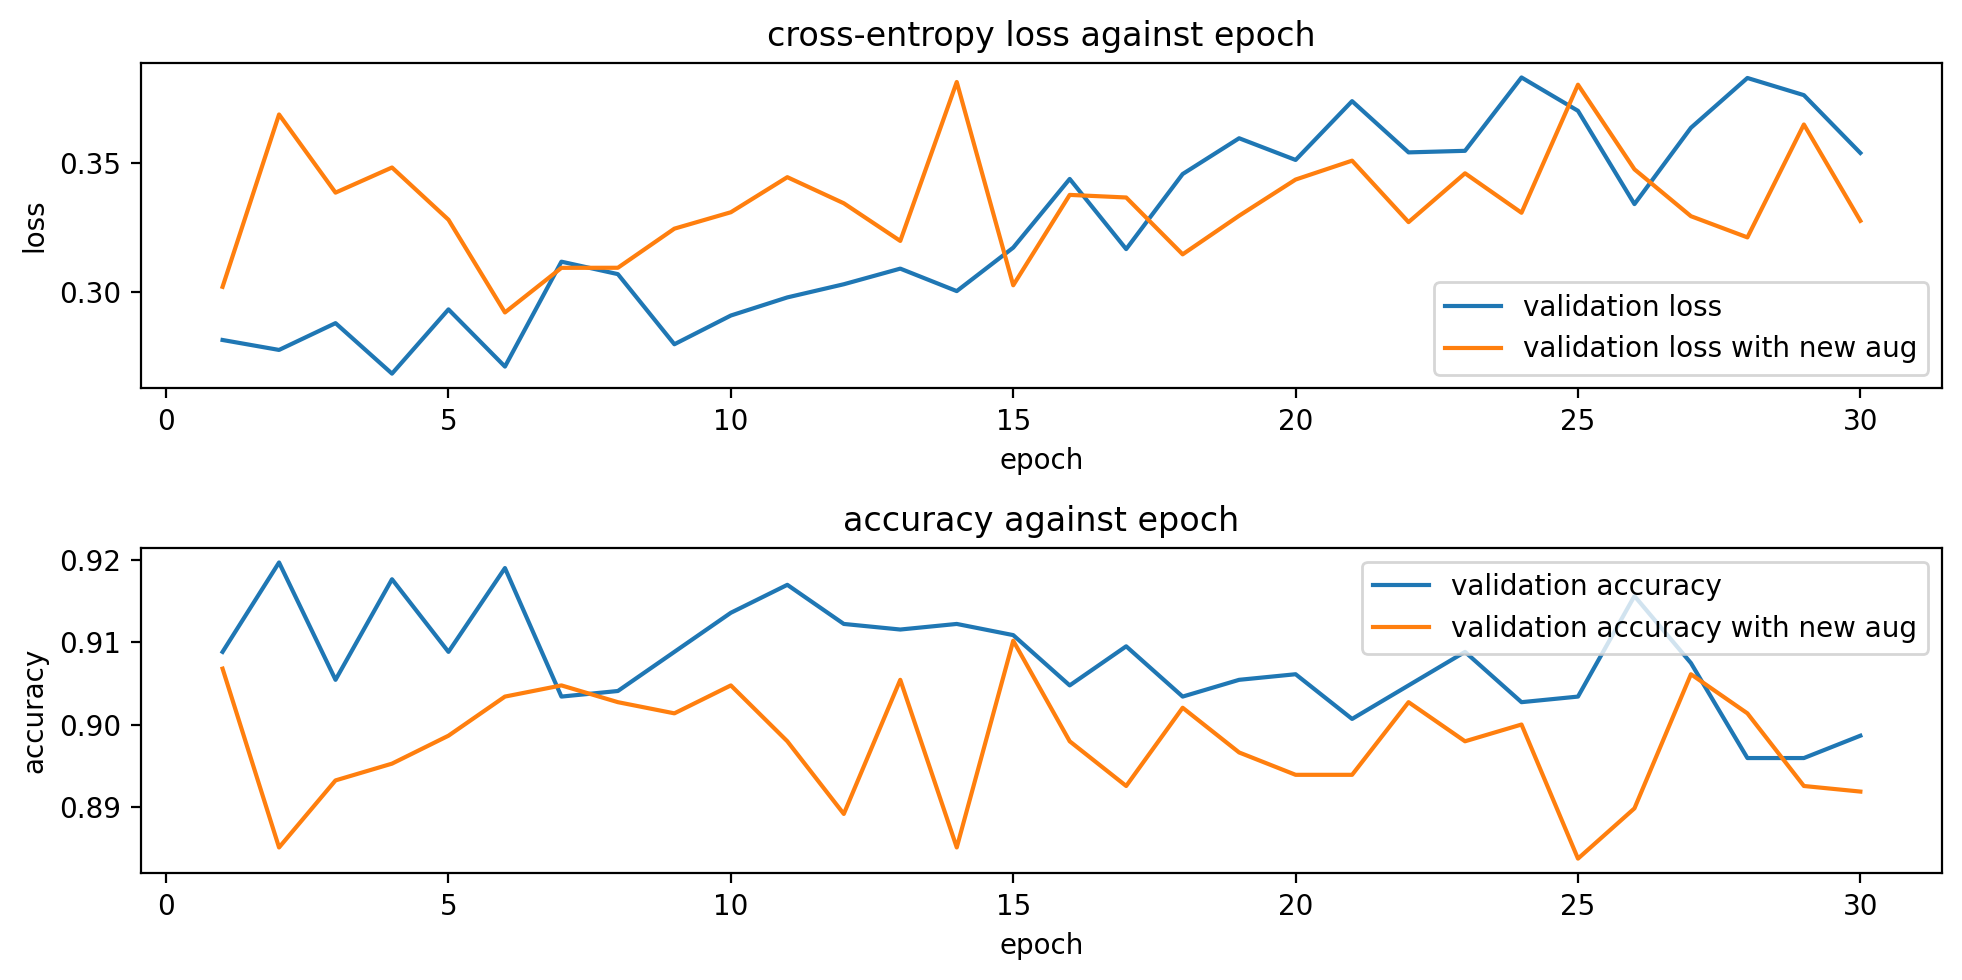

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200
fig, axs = plt.subplots(2)
axs[0].plot(hist_curr['valid loss'], label = 'validation loss')
axs[0].plot(hist_new['valid loss'], label = 'validation loss with new aug')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].legend()
axs[0].set_title(f'cross-entropy loss against epoch')
axs[1].plot(hist_curr['valid acc'], label = 'validation accuracy')
axs[1].plot(hist_new['valid acc'], label = 'validation accuracy with new aug')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].legend()
axs[1].set_title(f'accuracy against epoch')
fig.tight_layout()

# Ivan test

Install Pythoon 3.9 and torch, torchvision and import packages

In [ ]:
train_new_transform=transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ScaleJitter(target_size=[224,224]),
        transforms.ColorJitter(brightness=0.1,contrast=0.05),
        transforms.Resize(256),
        transforms.RandomCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

valid_transform=transforms.Compose([
        #transforms.RandomHorizontalFlip(),
        #transforms.RandomRotation(10),
        #transforms.ScaleJitter(target_size=[224,224]),
        #transforms.ColorJitter(brightness=0.1,contrast=0.05),
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [ ]:
#load images
train_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], train_new_transform)
valid_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)
test_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)

In [ ]:
#train-test split of indices
indices = np.array(range(len(image_labels.index)))

test_ratio = 0.1
valid_ratio = 0.2

non_test_idx, test_idx = train_test_split(indices, test_size = test_ratio, random_state = 1)
train_idx, valid_idx = train_test_split(non_test_idx, test_size = valid_ratio/(1-test_ratio), random_state = 1)

train_set = torch.utils.data.Subset(train_set, train_idx)
valid_set = torch.utils.data.Subset(valid_set, valid_idx)
test_set = torch.utils.data.Subset(test_set, test_idx)

print(f'train set has size of {len(train_set)}')
print(f'valid set has size of {len(valid_set)}')
print(f'test set has size of {len(test_set)}')

train set has size of 5144
valid set has size of 1470
test set has size of 735


In [ ]:
train_data_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle=True, num_workers = 4)
valid_data_loader = torch.utils.data.DataLoader(valid_set, batch_size = 64, shuffle=True, num_workers = 4)
test_data_loader = torch.utils.data.DataLoader(test_set, batch_size = 64, shuffle=True, num_workers = 4)
train_valid_loaders = {'train':train_data_loader, 'validation':valid_data_loader}
train_valid_sizes = {'train':len(train_set), 'validation':len(valid_set)}

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
#check if gpu avail
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
#send model to device
weights = models.ResNet18_Weights.DEFAULT
model = models.resnet18(weights)
model = model.to(device)
#define loss fn
loss = nn.CrossEntropyLoss()
#feature extracting or finetuning
feature_extraction = True



cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 162MB/s] 


In [ ]:
#unfreeze last 8 layers
# Results
# unfreeze last 4 layers (i.e. ct < 8): 0.889-ish
# unfreeze last 6 layers (i.e. ct < 7): Model achieves accuracy of 0.9047619047619047 on test set
# unfreeze last 8 layers (i.e. ct < 6): 0.8843537414965986
# Test with ct < 7, lr = 0.0001, epochs = 25 -->
ct = 0
for child in model.children():
    print(child)
    #print('hello')
    #print(ct)
    ct += 1
    if ct < 7:
        for param in child.parameters():
            #print(param)
            param.requires_grad = False
# set_parameter_requires_grad(model, feature_extraction)
# for param in model.layer4:
#     print(param)
#     param.requires_grad = True
#set_parameter_requires_grad(model_new, feature_extraction)

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace=True)
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fal

In [ ]:
#replace final layer
num_classes = 37
model.fc = nn.Linear(model.fc.in_features,num_classes)
model = model.to(device)

In [ ]:
params_to_update = []
for idx, (name, param) in enumerate(model.named_parameters()):
    if param.requires_grad:
        params_to_update.append(name)
        print(f'{idx}: {name}')
params_to_update.reverse()
prev_layer = params_to_update[0].split('.')[0]
lr = 0.0001
lr_factor = 0.2
params = []
#learning rate decreases the deeper we go
for idx, name in enumerate(params_to_update):

    curr_layer = name.split('.')[0]

    if curr_layer != prev_layer:
        lr *= lr_factor
    prev_layer = curr_layer
    params += [{'params': [p for n, p in model.named_parameters() if n == name],
                    'lr':     lr}]
optimizer = optim.Adam(params, lr = 0.0001)

30: layer3.0.conv1.weight
31: layer3.0.bn1.weight
32: layer3.0.bn1.bias
33: layer3.0.conv2.weight
34: layer3.0.bn2.weight
35: layer3.0.bn2.bias
36: layer3.0.downsample.0.weight
37: layer3.0.downsample.1.weight
38: layer3.0.downsample.1.bias
39: layer3.1.conv1.weight
40: layer3.1.bn1.weight
41: layer3.1.bn1.bias
42: layer3.1.conv2.weight
43: layer3.1.bn2.weight
44: layer3.1.bn2.bias
45: layer4.0.conv1.weight
46: layer4.0.bn1.weight
47: layer4.0.bn1.bias
48: layer4.0.conv2.weight
49: layer4.0.bn2.weight
50: layer4.0.bn2.bias
51: layer4.0.downsample.0.weight
52: layer4.0.downsample.1.weight
53: layer4.0.downsample.1.bias
54: layer4.1.conv1.weight
55: layer4.1.bn1.weight
56: layer4.1.bn1.bias
57: layer4.1.conv2.weight
58: layer4.1.bn2.weight
59: layer4.1.bn2.bias
60: fc.weight
61: fc.bias


In [ ]:
model_unfreeze_4, hist_unfreeze_4 = train_model(model, {'train':train_data_loader, 'validation':valid_data_loader}, loss, optimizer, 25)


_______________
Epoch 1 of 25
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 2.9979598173642787 
Accuracy: 0.2921850699844479


For validation set:  
Loss: 1.949588852512593 
Accuracy: 0.6401360544217687


_______________
Epoch 2 of 25
_______________
For train set:  
Loss: 1.8672461340994708 
Accuracy: 0.6652410575427683


For validation set:  
Loss: 1.1111790983044372 
Accuracy: 0.8210884353741496


_______________
Epoch 3 of 25
_______________
For train set:  
Loss: 1.3190360178658231 
Accuracy: 0.7577760497667185


For validation set:  
Loss: 0.795492565145298 
Accuracy: 0.8727891156462585


_______________
Epoch 4 of 25
_______________
For train set:  
Loss: 1.0256396513519168 
Accuracy: 0.80248833592535


For validation set:  
Loss: 0.6322735836716736 
Accuracy: 0.882312925170068


_______________
Epoch 5 of 25
_______________
For train set:  
Loss: 0.8545538959199125 
Accuracy: 0.8242612752721618


For validation set:  
Loss: 0.5319164556710898 
Accuracy: 0.8979591836734693


_______________
Epoch 6 of 25
_______________
For train 

In [ ]:
#test_model(model_curr, test_data_loader)
test_model(model_unfreeze_4, test_data_loader)

Model achieves accuracy of 0.91156462585034 on test set


In [ ]:
torch.save(model_unfreeze_4.state_dict(), '/content/gdrive/My Drive/DD2424/breeds_aug_unfreeze_4_50_epochs_ivan_test.pt')
hist_unfreeze_4.to_csv('/content/gdrive/My Drive/DD2424/breeds_aug_unfreeze_4_50epochs_hist_ivan_test.csv')

In [ ]:
hist_unfreeze_4.head()

# Resnet50 test

In [ ]:
train_new_transform=transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ScaleJitter(target_size=[224,224]),
        transforms.ColorJitter(brightness=0.1,contrast=0.05),
        transforms.Resize(256),
        transforms.RandomCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

valid_transform=transforms.Compose([
        #transforms.RandomHorizontalFlip(),
        #transforms.RandomRotation(10),
        #transforms.ScaleJitter(target_size=[224,224]),
        #transforms.ColorJitter(brightness=0.1,contrast=0.05),
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [ ]:
#load images
train_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], train_new_transform)
valid_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)
test_set = BreedImageDataset(image_labels, paths['IMAGE_DATA_PATH'], valid_transform)

In [ ]:
#train-test split of indices
indices = np.array(range(len(image_labels.index)))

test_ratio = 0.1
valid_ratio = 0.2

non_test_idx, test_idx = train_test_split(indices, test_size = test_ratio, random_state = 1)
train_idx, valid_idx = train_test_split(non_test_idx, test_size = valid_ratio/(1-test_ratio), random_state = 1)

train_set = torch.utils.data.Subset(train_set, train_idx)
valid_set = torch.utils.data.Subset(valid_set, valid_idx)
test_set = torch.utils.data.Subset(test_set, test_idx)

print(f'train set has size of {len(train_set)}')
print(f'valid set has size of {len(valid_set)}')
print(f'test set has size of {len(test_set)}')

train set has size of 5144
valid set has size of 1470
test set has size of 735


In [ ]:
train_data_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle=True, num_workers = 4)
valid_data_loader = torch.utils.data.DataLoader(valid_set, batch_size = 64, shuffle=True, num_workers = 4)
test_data_loader = torch.utils.data.DataLoader(test_set, batch_size = 64, shuffle=True, num_workers = 4)
train_valid_loaders = {'train':train_data_loader, 'validation':valid_data_loader}
train_valid_sizes = {'train':len(train_set), 'validation':len(valid_set)}

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
#check if gpu avail
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
#send model to device
weights = models.ResNet50_Weights.DEFAULT
model = models.resnet50(weights)
model = model.to(device)
#define loss fn
loss = nn.CrossEntropyLoss()
#feature extracting or finetuning
feature_extraction = True



cuda:0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 208MB/s]


In [ ]:
#unfreeze last 8 layers
# Results
# unfreeze last 4 layers (i.e. ct < 8): 0.889-ish
# unfreeze last 6 layers (i.e. ct < 7): Model achieves accuracy of 0.9047619047619047 on test set
# unfreeze last 8 layers (i.e. ct < 6): 0.8843537414965986
# Test with ct < 7, lr = 0.0001, epochs = 25 -->
ct = 0
for child in model.children():
    print(child)
    #print('hello')
    #print(ct)
    ct += 1
    if ct < 9:
        for param in child.parameters():
            #print(param)
            param.requires_grad = False
# set_parameter_requires_grad(model, feature_extraction)
# for param in model.layer4:
#     print(param)
#     param.requires_grad = True
#set_parameter_requires_grad(model_new, feature_extraction)

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace=True)
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, t

In [ ]:
#replace final layer
num_classes = 37
model.fc = nn.Linear(model.fc.in_features,num_classes)
model = model.to(device)

In [ ]:
params_to_update = []
for idx, (name, param) in enumerate(model.named_parameters()):
    if param.requires_grad:
        params_to_update.append(name)
        print(f'{idx}: {name}')
params_to_update.reverse()
prev_layer = params_to_update[0].split('.')[0]
lr = 0.0001
lr_factor = 0.2
params = []
optimizer = optim.Adam(get_params_learn(model), lr = 0.0001)

159: fc.weight
160: fc.bias
	 fc.weight
	 fc.bias


In [ ]:
model_resnet_50, hist_resnet_50 = train_model(model, {'train':train_data_loader, 'validation':valid_data_loader}, loss, optimizer, 50)


_______________
Epoch 1 of 50
_______________


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


For train set:  
Loss: 3.4617815229051034 
Accuracy: 0.13627527216174184


For validation set:  
Loss: 3.249935174150532 
Accuracy: 0.3897959183673469


_______________
Epoch 2 of 50
_______________
For train set:  
Loss: 3.1393759506486623 
Accuracy: 0.4572317262830482


For validation set:  
Loss: 2.9274090017591203 
Accuracy: 0.6714285714285714


_______________
Epoch 3 of 50
_______________
For train set:  
Loss: 2.8565530387647042 
Accuracy: 0.6475505443234837


For validation set:  
Loss: 2.6549946989331925 
Accuracy: 0.7673469387755102


_______________
Epoch 4 of 50
_______________
For train set:  
Loss: 2.603323918293646 
Accuracy: 0.7091757387247278


For validation set:  
Loss: 2.3895559966158704 
Accuracy: 0.8095238095238094


_______________
Epoch 5 of 50
_______________
For train set:  
Loss: 2.3816884116473873 
Accuracy: 0.7437791601866252


For validation set:  
Loss: 2.158066009015453 
Accuracy: 0.8346938775510203


_______________
Epoch 6 of 50
_______________
For tra

In [ ]:
#test_model(model_curr, test_data_loader)
test_model(model_resnet_50, test_data_loader)

Model achieves accuracy of 0.8789115646258503 on test set


tensor(0.8789, device='cuda:0', dtype=torch.float64)

In [ ]:
torch.save(model_resnet_50.state_dict(), '/content/gdrive/My Drive/DD2424/breeds_aug_unfreeze_4_50_epochs_aloy_test.pt')
hist_resnet_50.to_csv('/content/gdrive/My Drive/DD2424/breeds_aug_unfreeze_4_50epochs_hist_aloy_test.csv')